In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PolynomialFeatures
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from pmdarima import auto_arima




**RECOLECCIÓN DE DATOS**

In [2]:

# Cargar el archivo Excel para revisar las hojas y datos dentro del archivo
file_path = 'Base_de_proyecto1.xlsx'
excel_data = pd.ExcelFile(file_path)

# Ver las hojas contenidas en el archivo
sheet_names = excel_data.sheet_names
sheet_names
# Cargar los datos de la hoja "Ventas"
df = pd.read_excel(excel_data, sheet_name='Ventas')

# Ver las primeras filas de los datos para entender la estructura
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6302 entries, 0 to 6301
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fecha           6302 non-null   object 
 1   Num. Factura    6302 non-null   object 
 2   Comprobante     6302 non-null   object 
 3   Cliente         6302 non-null   object 
 4   Vendedor        6302 non-null   object 
 5   Referencia      6302 non-null   object 
 6   Descripción     6302 non-null   object 
 7   Costo Unitario  6302 non-null   float64
 8   Costo Total     6302 non-null   float64
 9   Cantidad        6302 non-null   int64  
 10  PVP             6302 non-null   float64
 11  Subtotal        6302 non-null   float64
 12  IVA             6302 non-null   float64
 13  Descuento       6302 non-null   float64
 14  Total           6302 non-null   float64
 15  Observaciones   3544 non-null   object 
dtypes: float64(7), int64(1), object(8)
memory usage: 787.9+ KB


,Fecha,Num. Factura,Comprobante,Cliente,Vendedor,Referencia,Descripción,Costo Unitario,Costo Total,Cantidad,PVP,Subtotal,IVA,Descuento,Total,Observaciones
0,2022-05-20,002-001-000000001,Factura directa,VICTOR ABAD SOLANO,VERONICA SILVA,TILCLT,LIMPIA CABEZAL MOORIM 1L,11.19000,22.3800,2,14.65,29.30,0.0,0.0,29.30,NaN
1,2022-05-20,002-001-000000001,Factura directa,VICTOR ABAD SOLANO,VERONICA SILVA,SIEPSON,SISTEMA OEM EPSON (TANQUES. CARTUCHOS. ACCES),6.25000,62.5000,10,9.00,90.00,0.0,0.0,90.00,NaN
2,2022-05-20,002-001-000000001,Factura directa,VICTOR ABAD SOLANO,VERONICA SILVA,TIDYE70B-664,TINTA DYE 70ML 664 BLACK MOORIM,0.91944,27.5832,30,1.75,52.50,0.0,4.2,48.30,NaN
3,2022-05-20,002-001-000000001,Factura directa,VICTOR ABAD SOLANO,VERONICA SILVA,TIDYE70M-664,TINTA DYE 70ML 664 MAGENTA MOORIM,1.26000,18.9000,15,1.75,26.25,0.0,2.1,24.15,NaN
4,2022-05-20,002-001-000000001,Factura directa,VICTOR ABAD SOLANO,VERONICA SILVA,TIDYE70C-664,TINTA DYE 70ML 664 CYAN MOORIM,1.26000,18.9000,15,1.75,26.25,0.0,2.1,24.15,NaN


**LIMPIEZA DE DATOS**

In [3]:
# 1. Limpieza de Datos

# Eliminar duplicados
df = df.drop_duplicates()

# Reellenar la colunma Observaciones
df['Observaciones'] = df['Observaciones'].fillna('Sin observaciones')

# Normalizar Datos
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Guardar el DataFrame corregido en un nuevo archivo Excel
df.to_excel('Base_de_proyecto1_corregida.xlsx', index=False)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6295 entries, 0 to 6301
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha           6295 non-null   datetime64[ns]
 1   Num. Factura    6295 non-null   object        
 2   Comprobante     6295 non-null   object        
 3   Cliente         6295 non-null   object        
 4   Vendedor        6295 non-null   object        
 5   Referencia      6295 non-null   object        
 6   Descripción     6295 non-null   object        
 7   Costo Unitario  6295 non-null   float64       
 8   Costo Total     6295 non-null   float64       
 9   Cantidad        6295 non-null   int64         
 10  PVP             6295 non-null   float64       
 11  Subtotal        6295 non-null   float64       
 12  IVA             6295 non-null   float64       
 13  Descuento       6295 non-null   float64       
 14  Total           6295 non-null   float64       
 15  Observaci

,Fecha,Num. Factura,Comprobante,Cliente,Vendedor,Referencia,Descripción,Costo Unitario,Costo Total,Cantidad,PVP,Subtotal,IVA,Descuento,Total,Observaciones
0,2022-05-20,002-001-000000001,Factura directa,VICTOR ABAD SOLANO,VERONICA SILVA,TILCLT,LIMPIA CABEZAL MOORIM 1L,11.19000,22.3800,2,14.65,29.30,0.0,0.0,29.30,Sin observaciones
1,2022-05-20,002-001-000000001,Factura directa,VICTOR ABAD SOLANO,VERONICA SILVA,SIEPSON,SISTEMA OEM EPSON (TANQUES. CARTUCHOS. ACCES),6.25000,62.5000,10,9.00,90.00,0.0,0.0,90.00,Sin observaciones
2,2022-05-20,002-001-000000001,Factura directa,VICTOR ABAD SOLANO,VERONICA SILVA,TIDYE70B-664,TINTA DYE 70ML 664 BLACK MOORIM,0.91944,27.5832,30,1.75,52.50,0.0,4.2,48.30,Sin observaciones
3,2022-05-20,002-001-000000001,Factura directa,VICTOR ABAD SOLANO,VERONICA SILVA,TIDYE70M-664,TINTA DYE 70ML 664 MAGENTA MOORIM,1.26000,18.9000,15,1.75,26.25,0.0,2.1,24.15,Sin observaciones
4,2022-05-20,002-001-000000001,Factura directa,VICTOR ABAD SOLANO,VERONICA SILVA,TIDYE70C-664,TINTA DYE 70ML 664 CYAN MOORIM,1.26000,18.9000,15,1.75,26.25,0.0,2.1,24.15,Sin observaciones


**IDENTIFICACIÓN Y DESCRIPCIÓN DE VARIABLES**

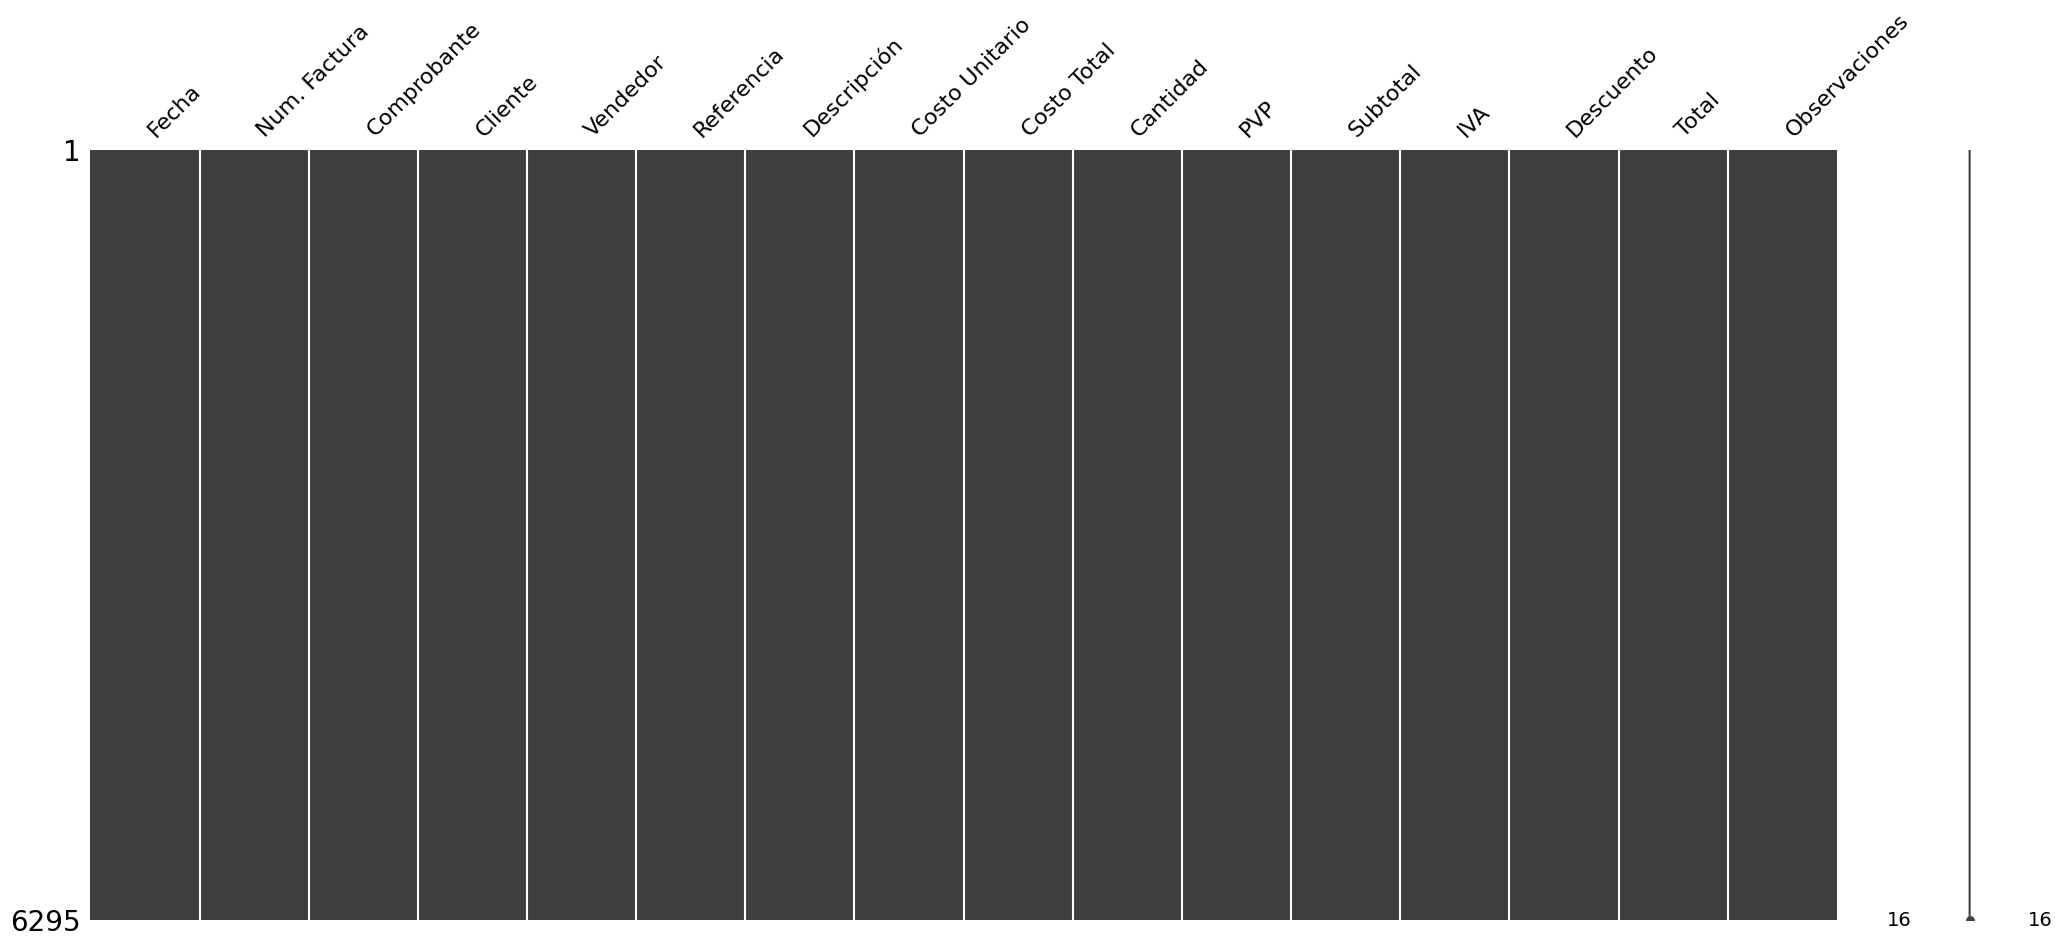

In [4]:
import missingno as msno
# Generar la matriz con todas las variables
msno.matrix(df)

# Guardar la imagen
plt.savefig('missing_data_matrix.png')


                Costo Unitario  Costo Total  Cantidad       PVP  Subtotal  \
Costo Unitario        1.000000     0.368346  0.037367  0.903528  0.368820   
Costo Total           0.368346     1.000000  0.547272  0.313287  0.983965   
Cantidad              0.037367     0.547272  1.000000  0.016245  0.545906   
PVP                   0.903528     0.313287  0.016245  1.000000  0.357763   
Subtotal              0.368820     0.983965  0.545906  0.357763  1.000000   
IVA                   0.303075     0.892548  0.459474  0.272626  0.893974   
Descuento             0.054776     0.015985 -0.000427  0.071102  0.025092   
Total                 0.364914     0.984242  0.542721  0.351601  0.998825   

                     IVA  Descuento     Total  
Costo Unitario  0.303075   0.054776  0.364914  
Costo Total     0.892548   0.015985  0.984242  
Cantidad        0.459474  -0.000427  0.542721  
PVP             0.272626   0.071102  0.351601  
Subtotal        0.893974   0.025092  0.998825  
IVA             1.

'matriz_correlacion_numerica.png'

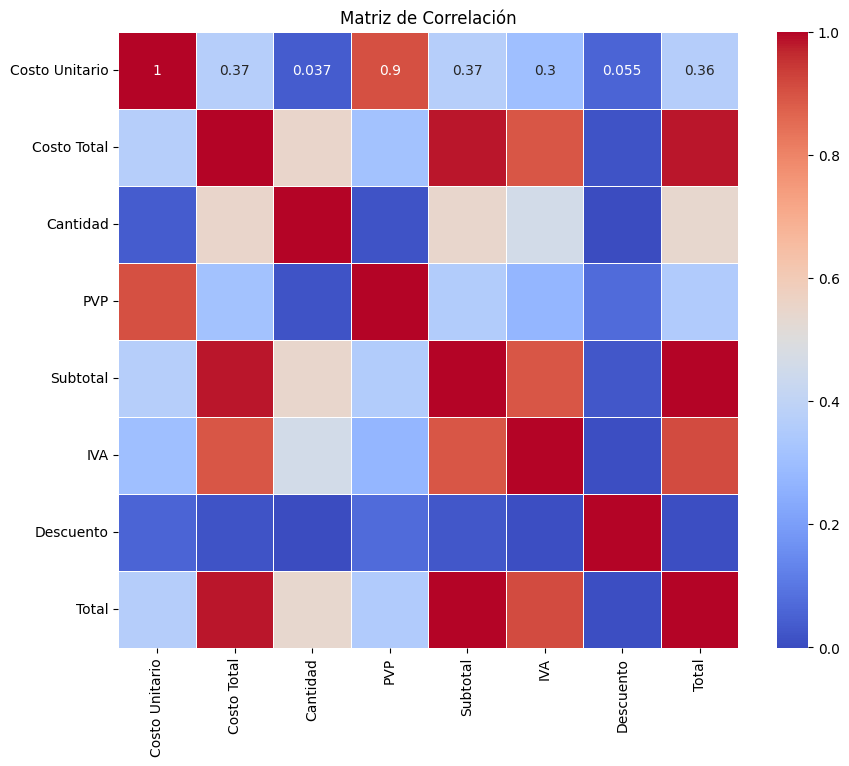

In [5]:
# Seleccionar solo las columnas numéricas para evitar errores de conversión
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Crear la matriz de correlación para las columnas numéricas
correlation_matrix = numeric_columns.corr()
# Mostrar la matriz de correlación
print(correlation_matrix)
# Configurar el gráfico
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Título del gráfico
plt.title('Matriz de Correlación')

# Guardar el gráfico como imagen
correlation_image_path = 'matriz_correlacion_numerica.png'
plt.savefig(correlation_image_path, bbox_inches='tight', dpi=300)

# Mostrar la matriz de correlación actualizada
correlation_image_path


In [6]:
#ver variables numericas
numeric_columns.describe()

,Costo Unitario,Costo Total,Cantidad,PVP,Subtotal,IVA,Descuento,Total
count,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000
mean,23.875515,89.432724,3.176807,36.143173,122.851424,8.857194,0.779579,130.891310
std,51.039467,477.996519,7.124123,69.733459,570.590892,62.030049,11.409935,626.505195
min,-6.831330,-95.638620,-1.000000,-53.571429,-53.571430,-6.428572,-107.142860,-60.000002
25%,0.943460,1.472230,1.000000,5.000000,6.000000,0.000000,0.000000,6.000000
50%,4.895490,6.600000,1.000000,8.928571,15.180000,0.000000,0.000000,16.800000
75%,16.800000,33.600000,3.000000,20.994000,56.000000,1.500000,0.000000,53.250000
max,478.110000,16704.472000,200.000000,680.000000,19937.500000,2392.500000,594.642860,22330.000000


**VISUALIZACIÓN DE VARIABLES**

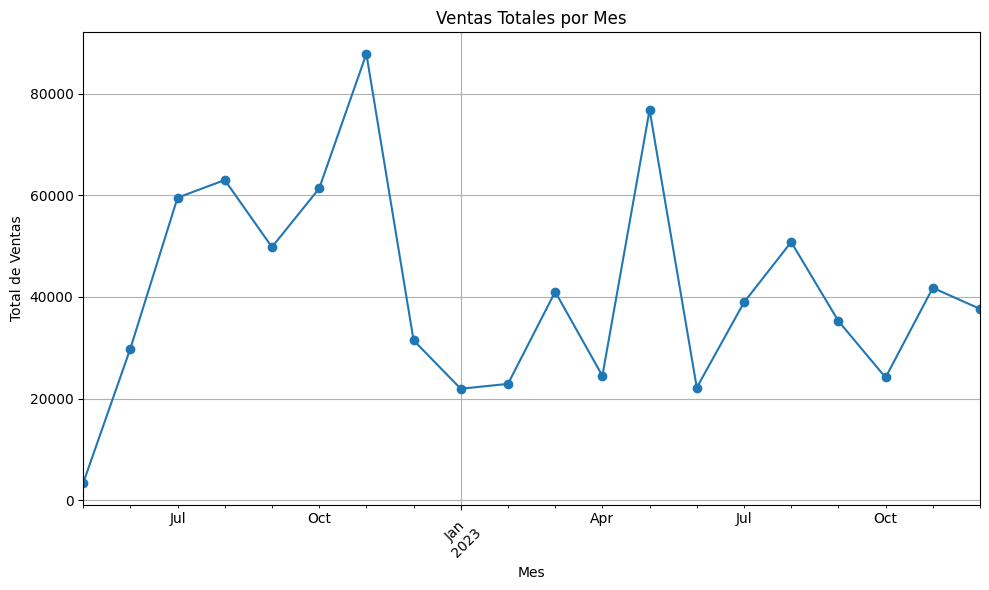

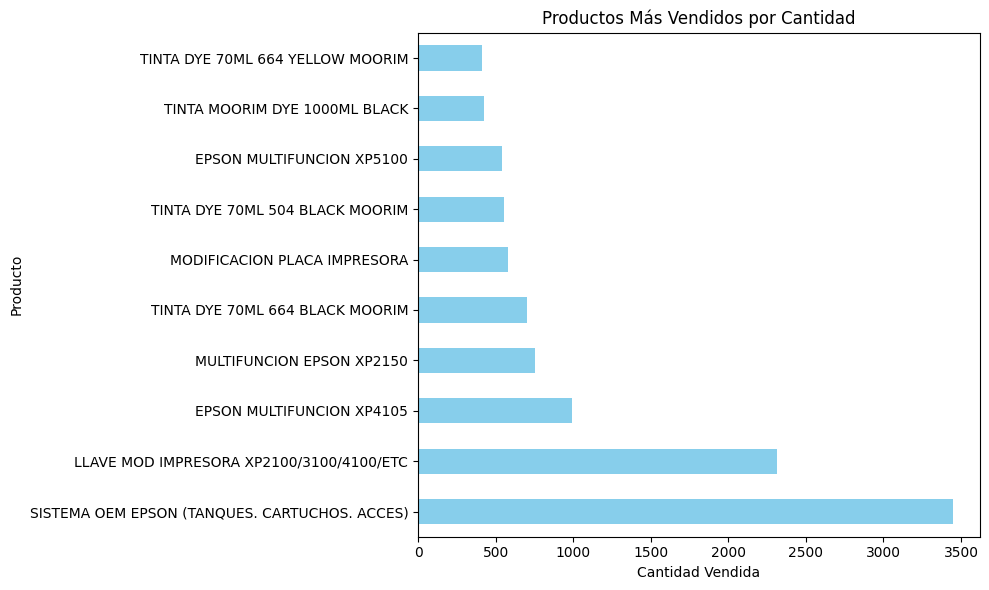

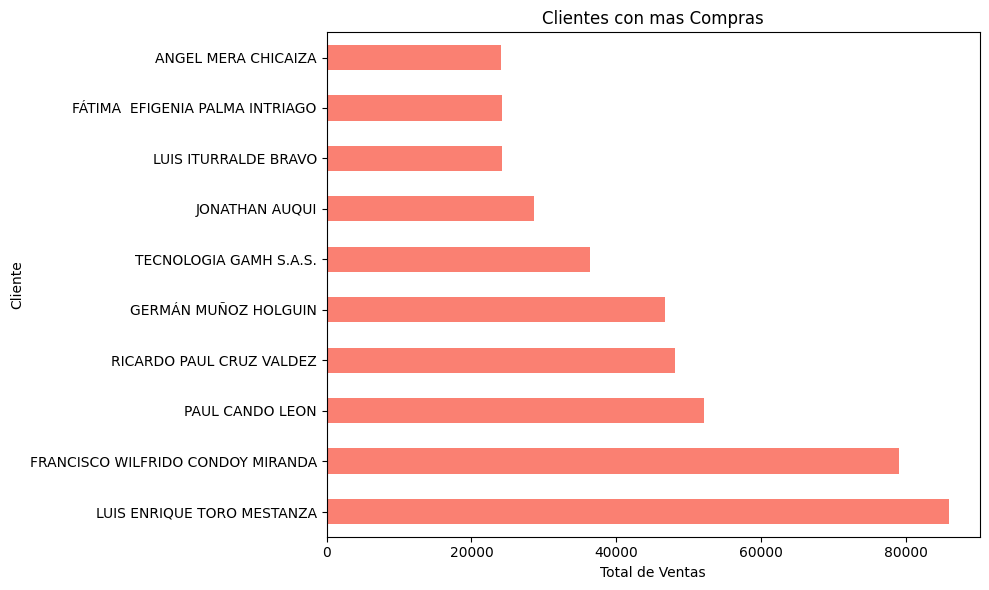

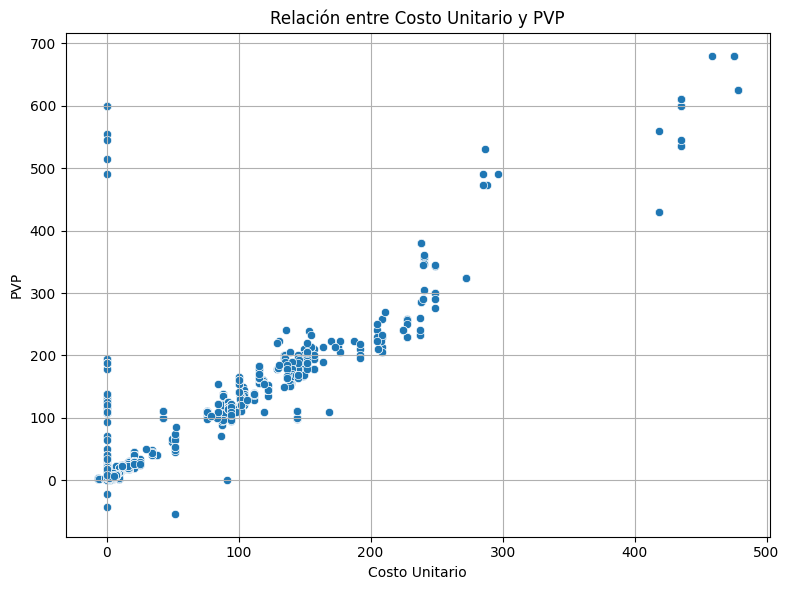

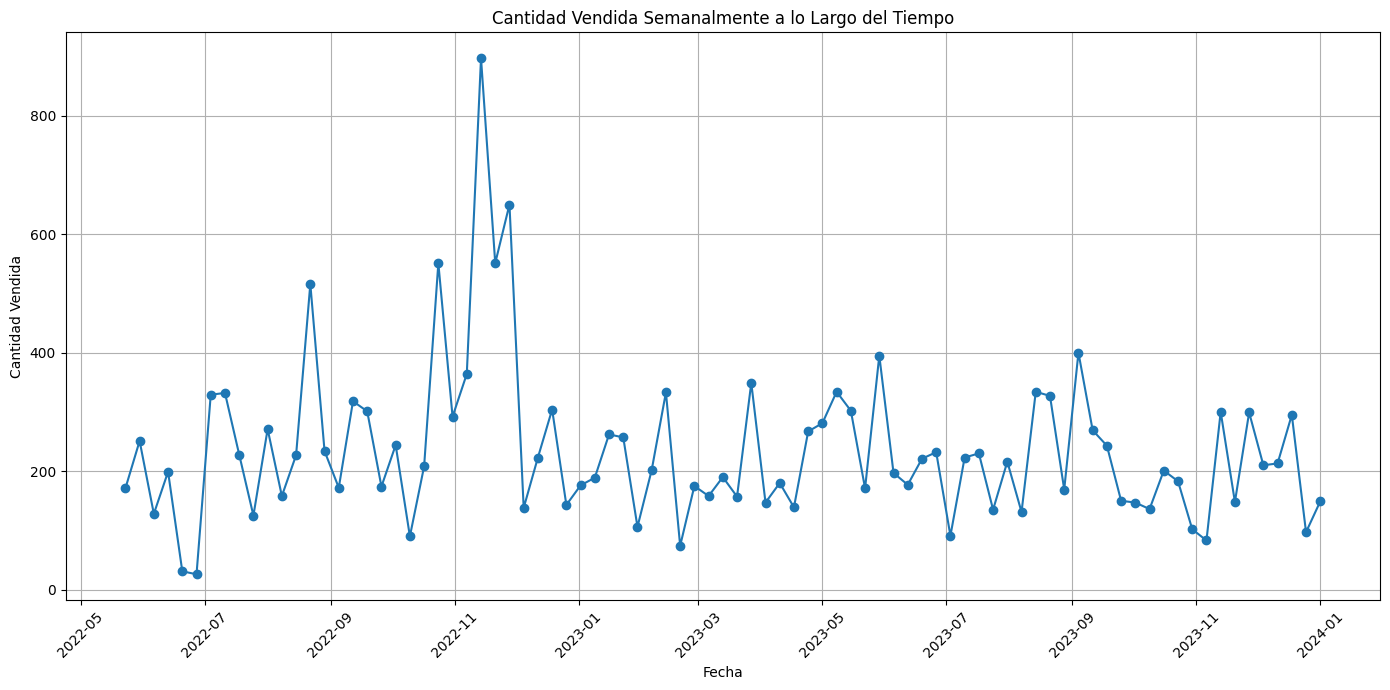

In [7]:
# Visualización 1: Tendencia de ventas a lo largo del tiempo (Total de ventas por mes)
df['Mes'] = df['Fecha'].dt.to_period('M')
ventas_por_mes = df.groupby('Mes')['Total'].sum()

plt.figure(figsize=(10, 6))
ventas_por_mes.plot(kind='line', marker='o')
plt.title('Ventas Totales por Mes')
plt.xlabel('Mes')
plt.ylabel('Total de Ventas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('VV1.png')
plt.show()

# Visualización 2: Productos más vendidos (por cantidad)
productos_mas_vendidos = df.groupby('Descripción')['Cantidad'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
productos_mas_vendidos.plot(kind='barh', color='skyblue')
plt.title('Productos Más Vendidos por Cantidad')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.tight_layout()
plt.savefig('VV2.png')
plt.show()

# Visualización 3: Clientes principales por valor total de ventas
clientes_top = df.groupby('Cliente')['Total'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
clientes_top.plot(kind='barh', color='salmon')
plt.title('Clientes con mas Compras')
plt.xlabel('Total de Ventas')
plt.ylabel('Cliente')
plt.tight_layout()
plt.savefig('VV3.png')
plt.show()

# Visualización 4. Diagrama de dispersión entre PVP y Costo Unitario
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Costo Unitario', y='PVP', data=df)
plt.title('Relación entre Costo Unitario y PVP')
plt.xlabel('Costo Unitario')
plt.ylabel('PVP')
plt.grid(True)
plt.tight_layout()
plt.savefig('VV4.png')
plt.show()

# Visualización 5. Cantidades semanales vendidas

cantidad_semanal= df.resample('W-Mon', on='Fecha').agg({'Cantidad': 'sum'}).reset_index().sort_values(by='Fecha')

plt.figure(figsize=(14, 7))
plt.plot(cantidad_semanal['Fecha'], cantidad_semanal['Cantidad'], marker='o')
plt.title('Cantidad Vendida Semanalmente a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('VV5.png')
plt.show()



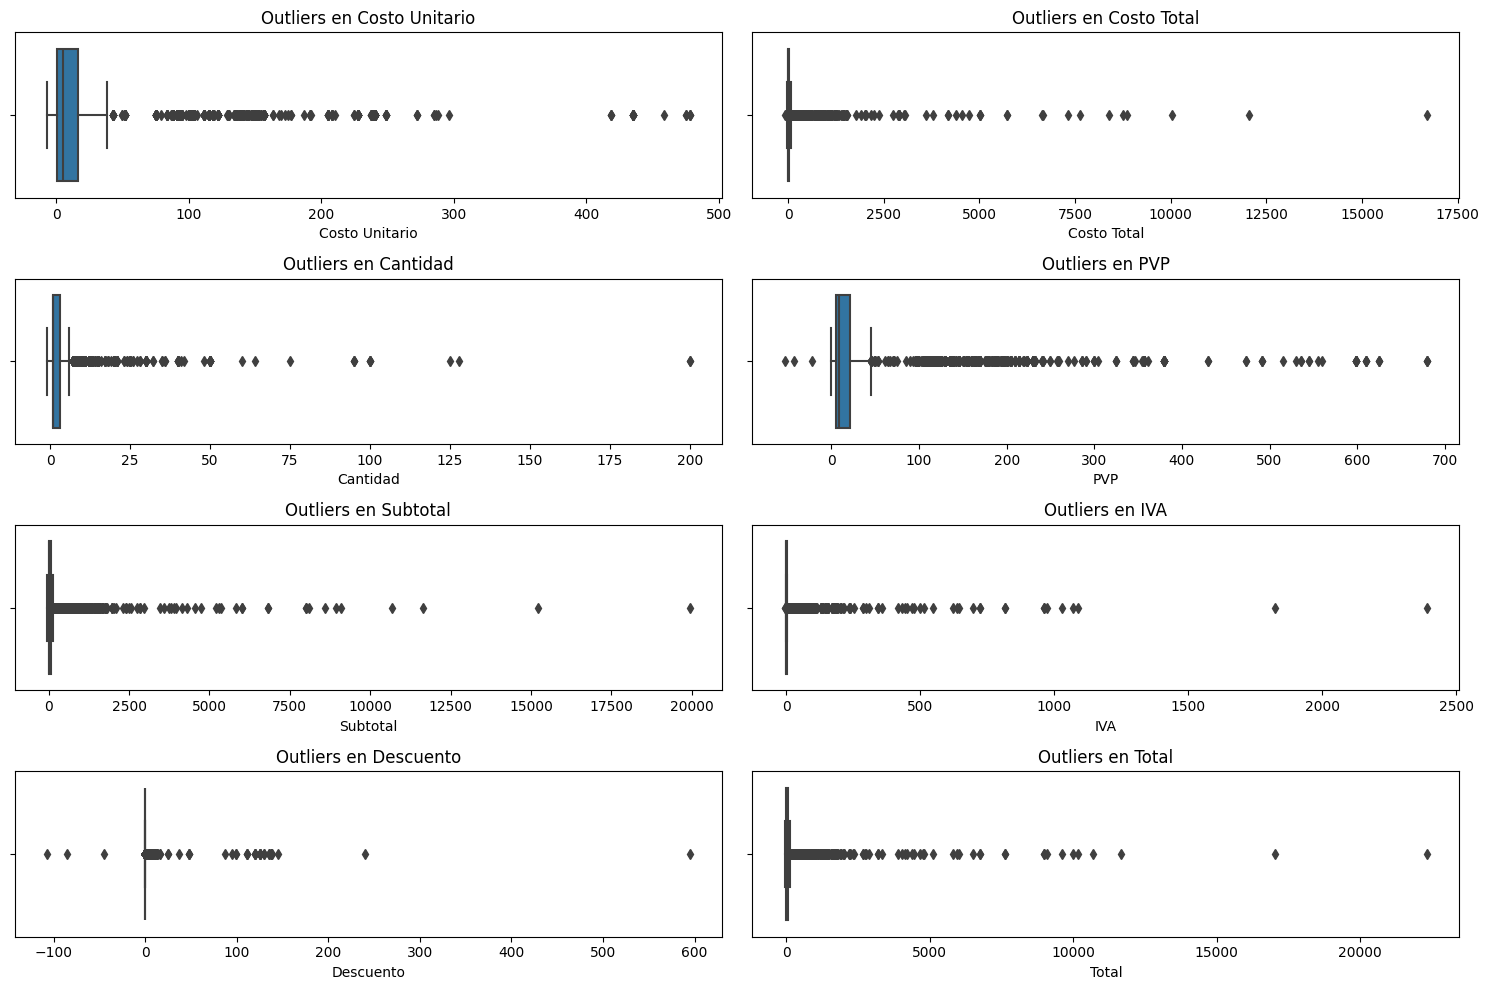

In [8]:
# Usar el conjunto de datos limpio anterior para identificar y analizar los outliers
numeric_columns = ['Costo Unitario', 'Costo Total', 'Cantidad', 'PVP', 'Subtotal', 'IVA', 'Descuento', 'Total']

# Crear diagramas de caja (boxplots) para visualizar los outliers en las variables numéricas
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Outliers en {col}')

plt.tight_layout()
plt.savefig('atipico.png')
plt.show()


**TRANSFORMACIÓN LOGARITMICA DE DATOS**

In [9]:
import numpy as np
# Para aplicar la transformación logarítmica, primero necesitamos asegurarnos de que no haya valores negativos o ceros.
# Añadimos una pequeña constante a los valores para evitar problemas con el logaritmo de cero.

# Filtrar las columnas para evitar valores negativos y cero
df_log = df.copy()
# Reaplicar el código con la importación correcta
df_log['Log_Costo Unitario'] = (df_log['Costo Unitario'] + 1).apply(lambda x: np.log(x) if x > 0 else 0)
df_log['Log_PVP'] = (df_log['PVP'] + 1).apply(lambda x: np.log(x) if x > 0 else 0)
df_log['Log_Total'] = (df_log['Total'] + 1).apply(lambda x: np.log(x) if x > 0 else 0)

# Generar un análisis descriptivo para las variables transformadas
descriptive_stats_log = df_log[['Log_Costo Unitario', 'Log_PVP', 'Log_Total']].describe()

# Mostrar el análisis descriptivo en tu entorno
print(df_log[['Log_Costo Unitario', 'Log_PVP', 'Log_Total']].describe())

       Log_Costo Unitario      Log_PVP    Log_Total
count         6295.000000  6295.000000  6295.000000
mean             1.891807     2.646752     3.195895
std              1.527667     1.252355     1.576433
min              0.000000     0.000000     0.000000
25%              0.664470     1.791759     1.945910
50%              1.774188     2.295417     2.879198
75%              2.879198     3.090770     3.993507
max              6.171930     6.523562    10.013731


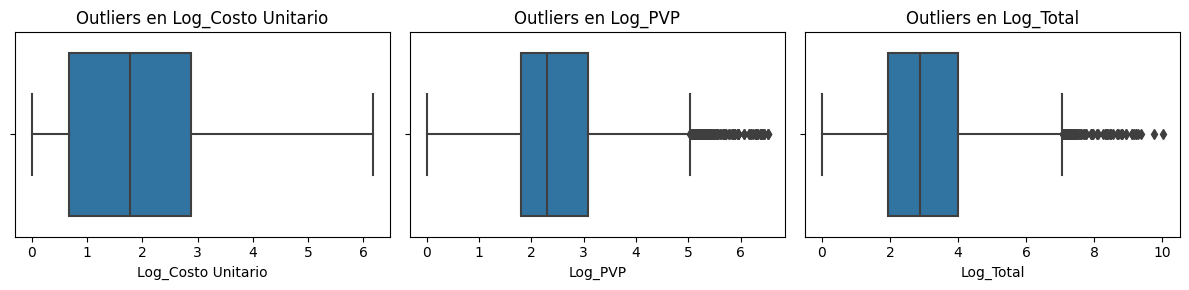

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar los datos transformados
plt.figure(figsize=(12,3))

# Boxplot para las variables transformadas
for i, col in enumerate(['Log_Costo Unitario', 'Log_PVP', 'Log_Total'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df_log[col])
    plt.title(f'Outliers en {col}')

plt.tight_layout()
plt.savefig('datos transformados.png')
plt.show()


**VISUALIZACIÓN DE DATOS CON LOGARITMOS**

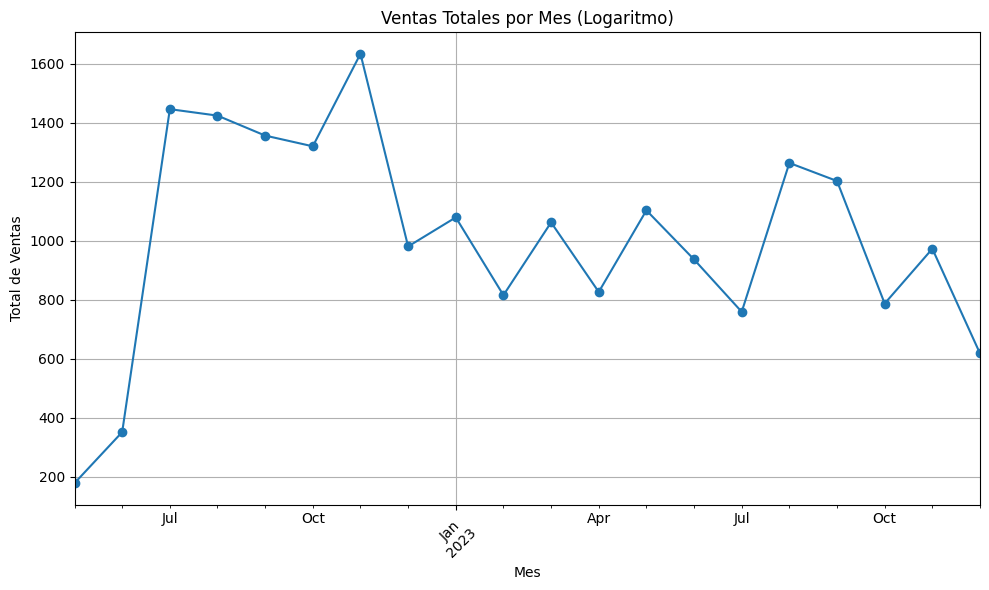

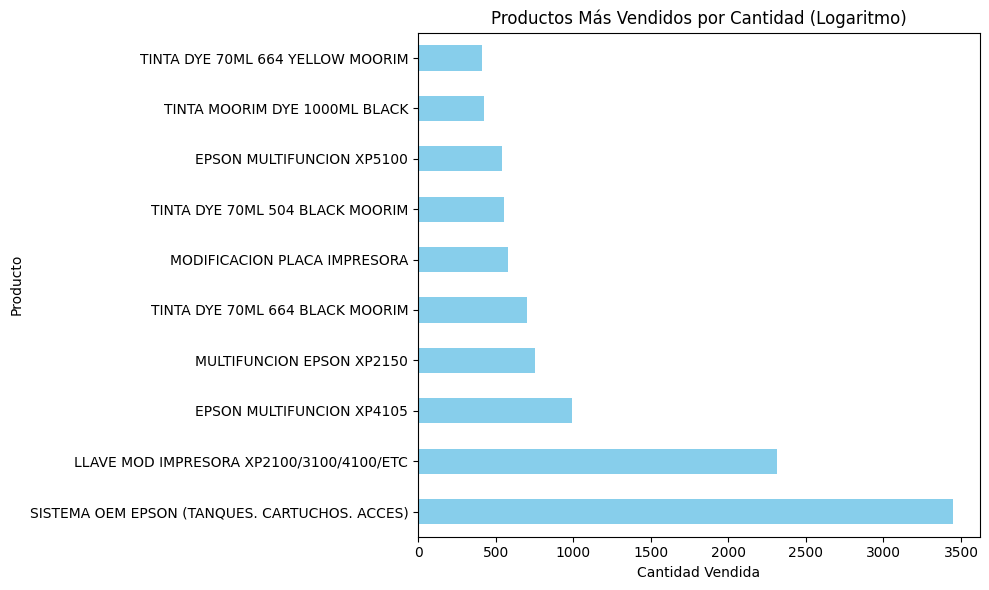

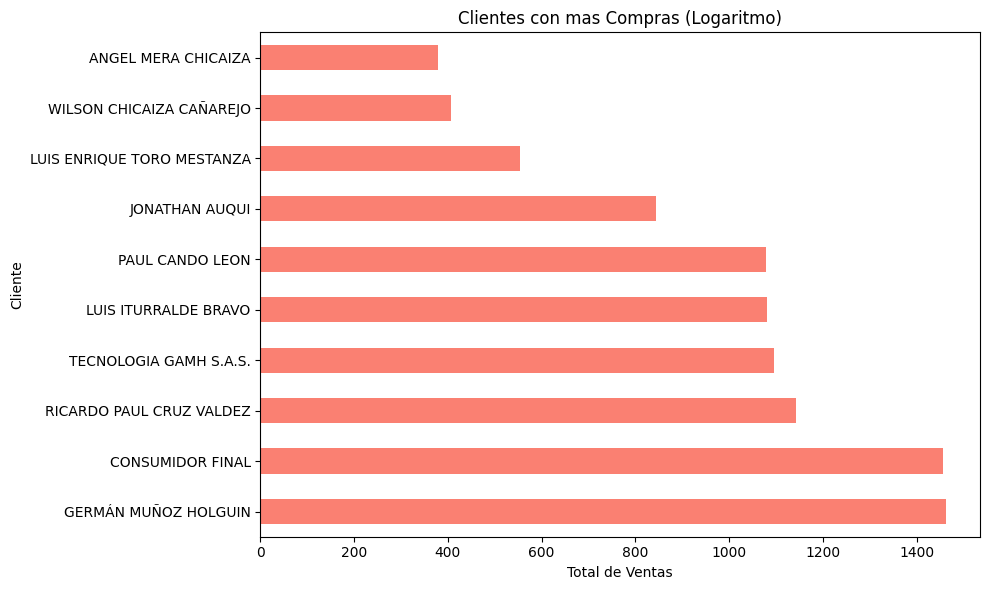

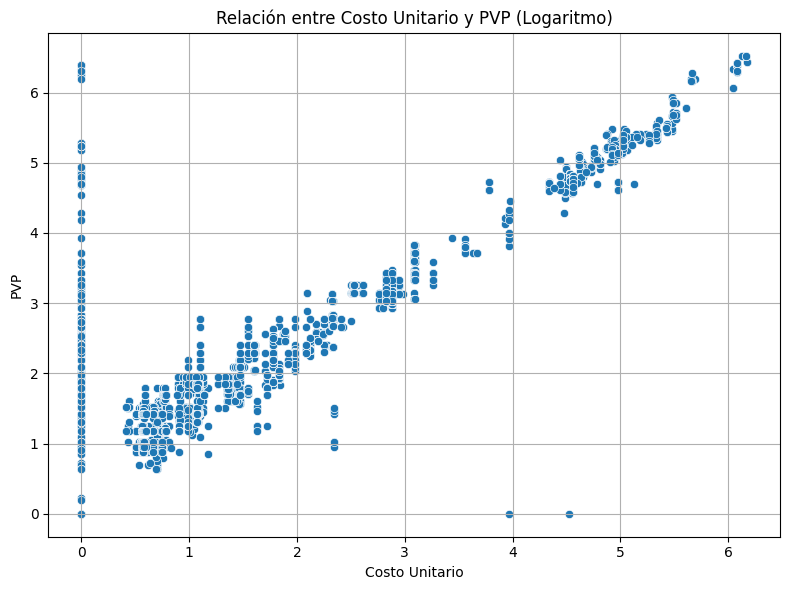

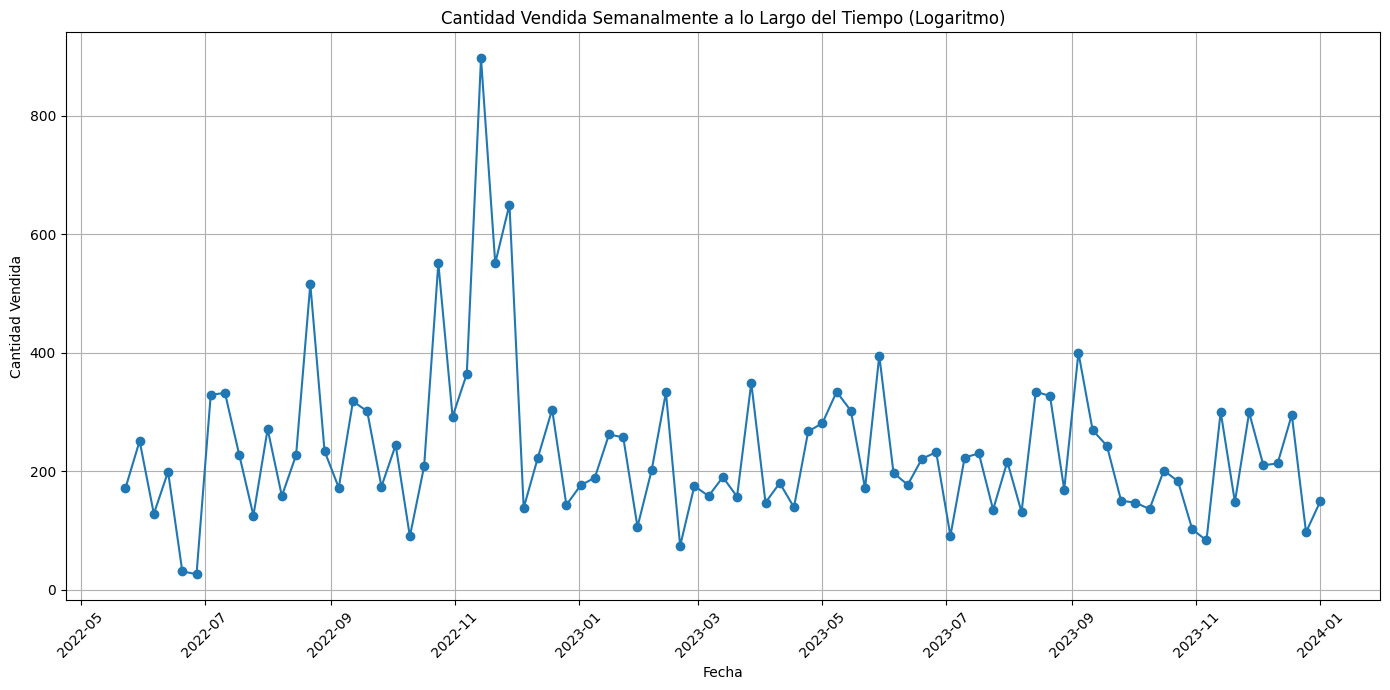

In [11]:
# 1. Gráfico de series de tiempo para las ventas totales por mes
ventas_por_mes = df_log.groupby(df_log['Fecha'].dt.to_period('M'))['Log_Total'].sum()
# Agrupar las ventas mensuales con el Log_Total

plt.figure(figsize=(10, 6))
ventas_por_mes.plot(kind='line', marker='o')
plt.title('Ventas Totales por Mes (Logaritmo)')
plt.xlabel('Mes')
plt.ylabel('Total de Ventas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('log1.png')
plt.show()

# 2. Gráfico de barras: Productos más vendidos
productos_mas_vendidos = df_log.groupby('Descripción')['Cantidad'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
productos_mas_vendidos.plot(kind='barh', color='skyblue')
plt.title('Productos Más Vendidos por Cantidad (Logaritmo)')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.tight_layout()
plt.savefig('log2.png')
plt.show()

# 3. Gráfico de barras: Clientes principales por valor total de ventas

clientes_top = df_log.groupby('Cliente')['Log_Total'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
clientes_top.plot(kind='barh', color='salmon')
plt.title('Clientes con mas Compras (Logaritmo)')
plt.xlabel('Total de Ventas')
plt.ylabel('Cliente')
plt.tight_layout()
plt.savefig('log3.png')
plt.show()

# 4. Diagrama de dispersión entre PVP y Costo Unitario
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Log_Costo Unitario', y='Log_PVP', data=df_log)
plt.title('Relación entre Costo Unitario y PVP (Logaritmo)')
plt.xlabel('Costo Unitario')
plt.ylabel('PVP')
plt.grid(True)
plt.tight_layout()
plt.savefig('log4.png')
plt.show()

# 5. Grafico de Cantidades semanales vendidas

cantidad_semanal= df_log.resample('W-Mon', on='Fecha').agg({'Cantidad': 'sum'}).reset_index().sort_values(by='Fecha')

plt.figure(figsize=(14, 7))
plt.plot(cantidad_semanal['Fecha'], cantidad_semanal['Cantidad'], marker='o')
plt.title('Cantidad Vendida Semanalmente a lo Largo del Tiempo (Logaritmo)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('log5.png')
plt.show()



<h2>SELECCIÓN DE MODELO ESTADÍSTICO<h2>

<h5>MODELO ARIMA PARA LA PREDICCIÓN DE VENTA<h5>

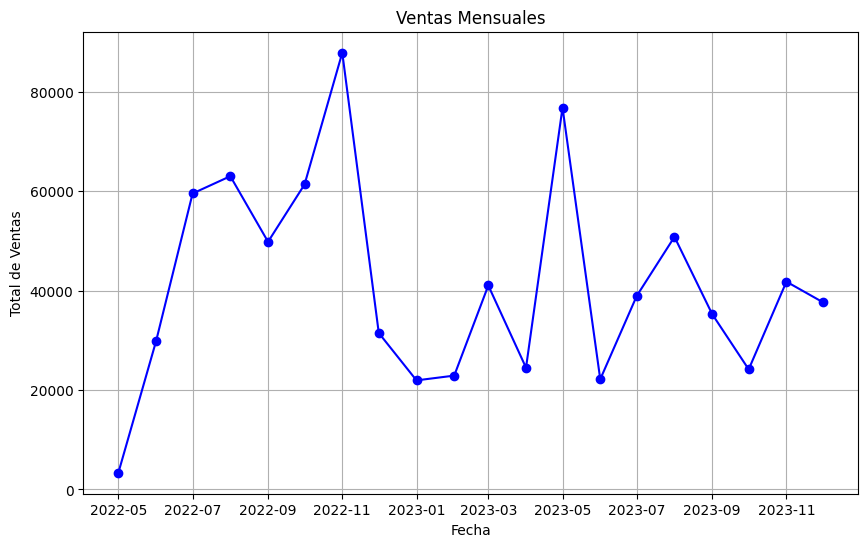

ADF Statistic: -0.647041
p-value: 0.859995
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730
La serie no es estacionaria (no podemos rechazar la hipótesis nula).


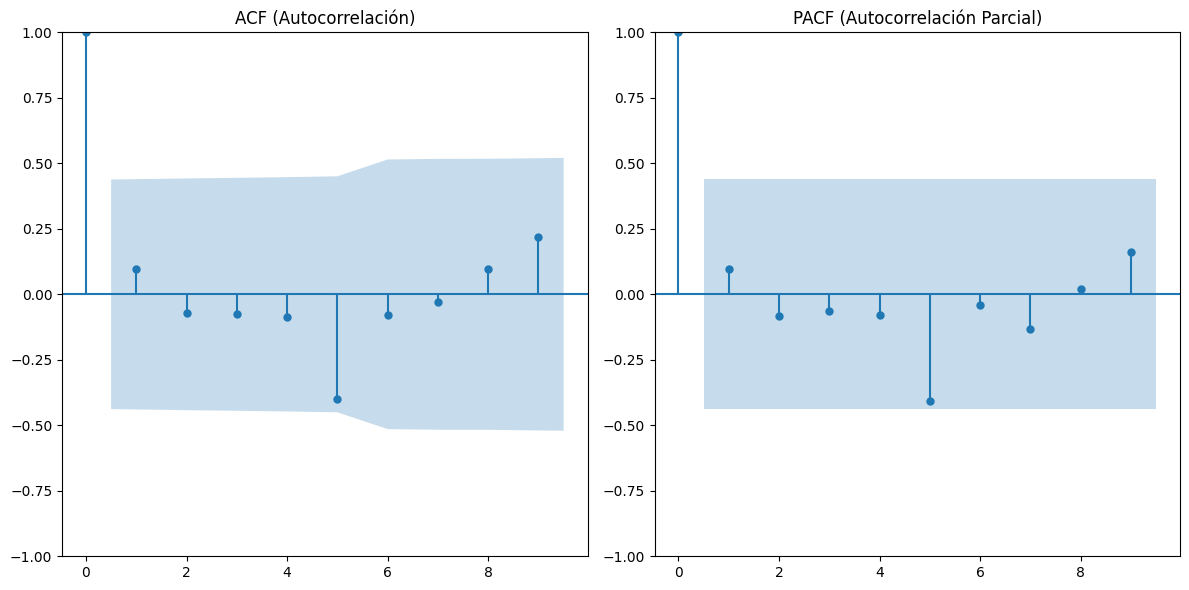

Valores seleccionados: p=8, d=1, q=7


C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   20
Model:                 ARIMA(8, 1, 7)   Log Likelihood                -215.078
Date:                Wed, 13 Nov 2024   AIC                            462.156
Time:                        12:18:04   BIC                            477.267
Sample:                    05-01-2022   HQIC                           464.713
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7413    120.846     -0.006      0.995    -237.595     236.113
ar.L2         -0.6461     27.708     -0.023      0.981     -54.954      53.662
ar.L3         -0.7430    101.491     -0.007      0.9

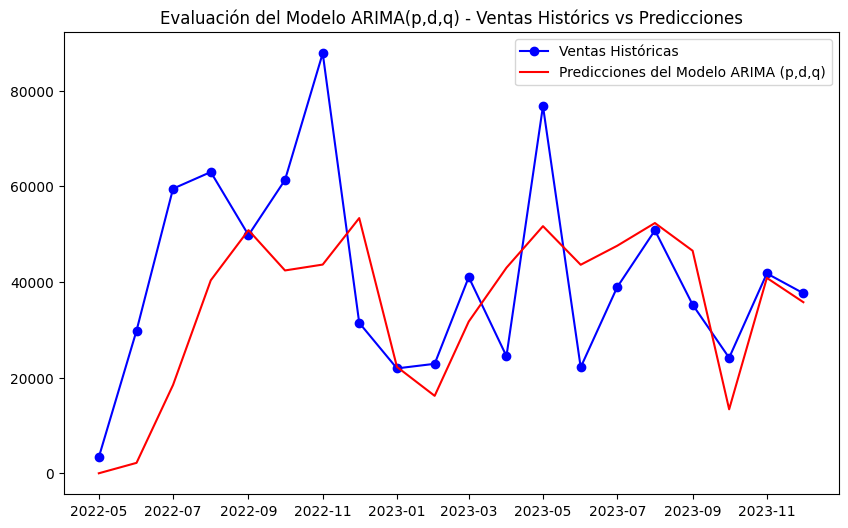

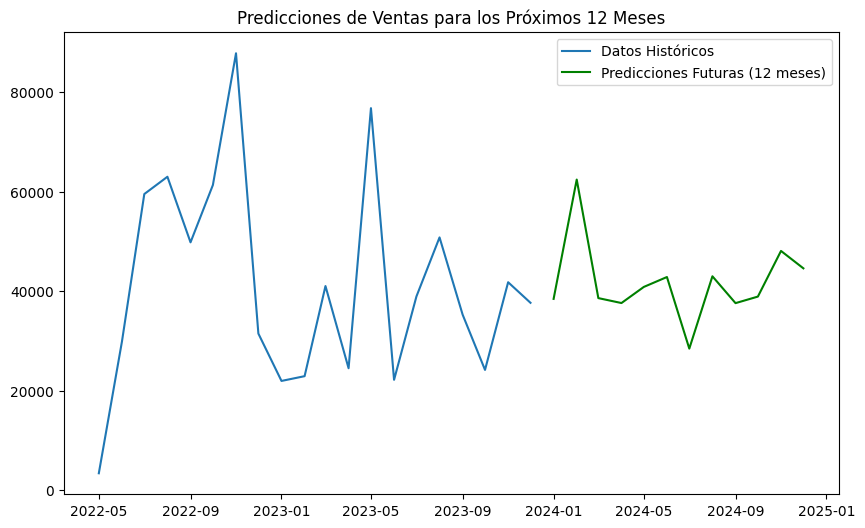

2024-01-01    38436.160083
2024-02-01    62431.468432
2024-03-01    38589.678850
2024-04-01    37598.582723
2024-05-01    40838.568935
2024-06-01    42830.006669
2024-07-01    28433.906007
2024-08-01    42978.181445
2024-09-01    37578.655405
2024-10-01    38896.603970
2024-11-01    48076.816100
2024-12-01    44578.281363
Freq: MS, Name: predicted_mean, dtype: float64

In [12]:
# Agrupar las ventas mensuales con el Log_Total
ventas_mensuales = df.groupby(df['Fecha'].dt.to_period('M'))['Total'].sum()
ventas_mensuales.index = ventas_mensuales.index.to_timestamp()

# Visualizar los datos de ventas mensuales 
plt.figure(figsize=(10,6))
plt.plot(ventas_mensuales,label='Ventas Mensuales',marker='o', linestyle='-', color='blue')
plt.title('Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Total de Ventas')
plt.grid(True)
plt.show()

# Prueba ADF para verificar estacionariedad
result = adfuller(ventas_mensuales)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Comprobación de estacionariedad
if result[1] < 0.05:
    d=0
    print("La serie es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La serie no es estacionaria (no podemos rechazar la hipótesis nula).")
    d=1

# Verificar la longitud de la serie temporal
n_points = len(ventas_mensuales)
max_lags = int(n_points // 2) - 1  # El número máximo de rezagos permitidos

# Usar el menor entre 10 o el número máximo de rezagos permitidos
num_lags = min(10, max_lags)

# Graficar ACF y PACF con el número ajustado de rezagos
plt.figure(figsize=(12,6))

# Gráfico de ACF
plt.subplot(121)
plot_acf(ventas_mensuales, ax=plt.gca(), lags=num_lags)
plt.title('ACF (Autocorrelación)')

# Gráfico de PACF
plt.subplot(122)
plot_pacf(ventas_mensuales, ax=plt.gca(), lags=num_lags)
plt.title('PACF (Autocorrelación Parcial)')
plt.tight_layout()
plt.savefig('Arima1.png')
plt.show()

# Calcular los valores de ACF y PACF
acf_values = acf(ventas_mensuales, nlags=num_lags)
pacf_values = pacf(ventas_mensuales, nlags=num_lags)

# Encontrar el primer valor donde ACF y PACF cruzan el umbral de significancia (donde se acercan a 0)
p = next((i for i, val in enumerate(pacf_values) if abs(val) < 0.05), 0)
q = next((i for i, val in enumerate(acf_values) if abs(val) < 0.05), 0)

# Mostrar los valores seleccionados de p, d y q
print(f"Valores seleccionados: p={p}, d={d}, q={q}")

# Entrenar el modelo ARIMA(p,d,q) sobre las ventas mensuales con Total
model_arima = ARIMA(ventas_mensuales, order=(p, d, q))
model_fit = model_arima.fit()

# Resumen del modelo ajustado
print(model_fit.summary())

# Realizar predicciones para los últimos datos históricos para evaluar el modelo
predictions = model_fit.predict(start=0, end=len(ventas_mensuales)-1, dynamic=False)

# Calcular el error de la predicción
rmse = np.sqrt(mean_squared_error(ventas_mensuales, predictions))
print(f'RMSE del modelo: {rmse}')

# Visualizar las predicciones frente a los datos históricos
plt.figure(figsize=(10,6))
plt.plot(ventas_mensuales, label='Ventas Históricas', marker='o', linestyle='-', color='blue')
plt.plot(predictions, color='red', label='Predicciones del Modelo ARIMA (p,d,q)' )
plt.legend()
plt.title('Evaluación del Modelo ARIMA(p,d,q) - Ventas Histórics vs Predicciones')
plt.savefig('Arima2.png')
plt.show()

# Realizar predicciones para los próximos 12 meses
forecast = model_fit.forecast(steps=12)

# Graficar las predicciones futuras
plt.figure(figsize=(10,6))
plt.plot(ventas_mensuales, label='Datos Históricos')
plt.plot(forecast, color='green', label='Predicciones Futuras (12 meses)')
plt.legend()
plt.title('Predicciones de Ventas para los Próximos 12 Meses')
plt.savefig('Arima3.png')
plt.show()
# Mostrar las predicciones de los próximos 12 meses
forecast


<h3>MODELO SARIMA<h3>

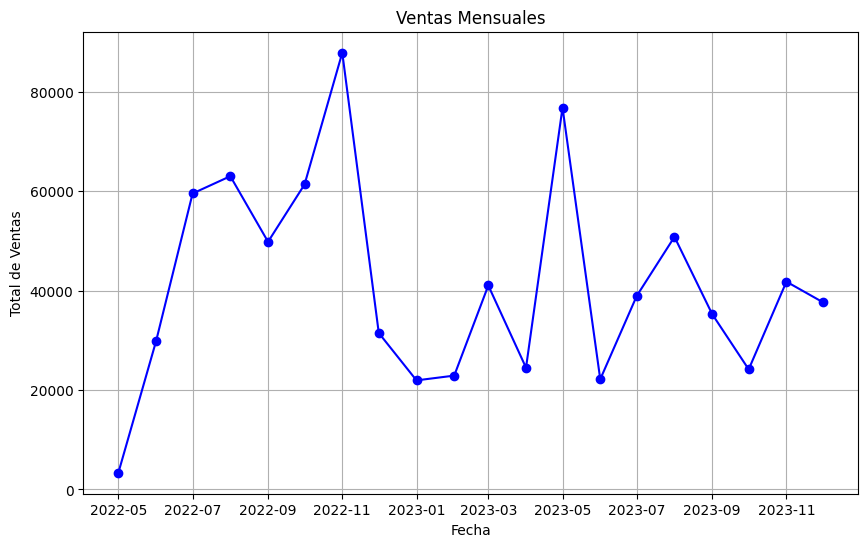

ADF Statistic: -0.647041
p-value: 0.859995
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730
La serie no es estacionaria con d=1.


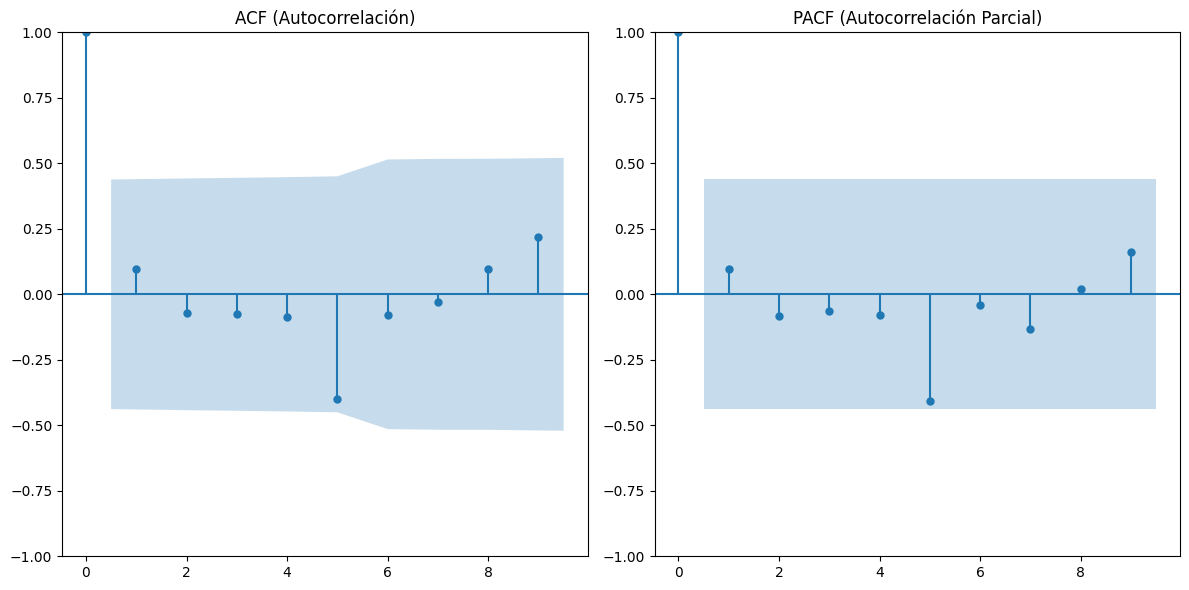

La serie es estacionaria con D=1.
Valores seleccionados: p=8, d=1, q=7, P=7, D=1, Q=6, s=12


C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                              SARIMAX Results                                              
Dep. Variable:                                               Total   No. Observations:                   20
Model:             SARIMAX(8, 1, 7)x(7, 1, [1, 2, 3, 4, 5, 6], 12)   Log Likelihood                 -78.250
Date:                                             Wed, 13 Nov 2024   AIC                            214.501
Time:                                                     12:18:52   BIC                            212.932
Sample:                                                 05-01-2022   HQIC                           195.113
                                                      - 12-01-2023                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

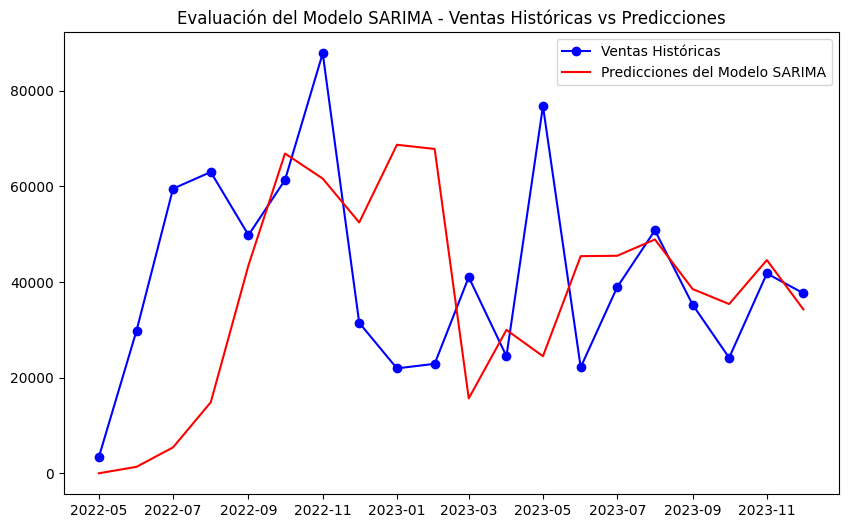

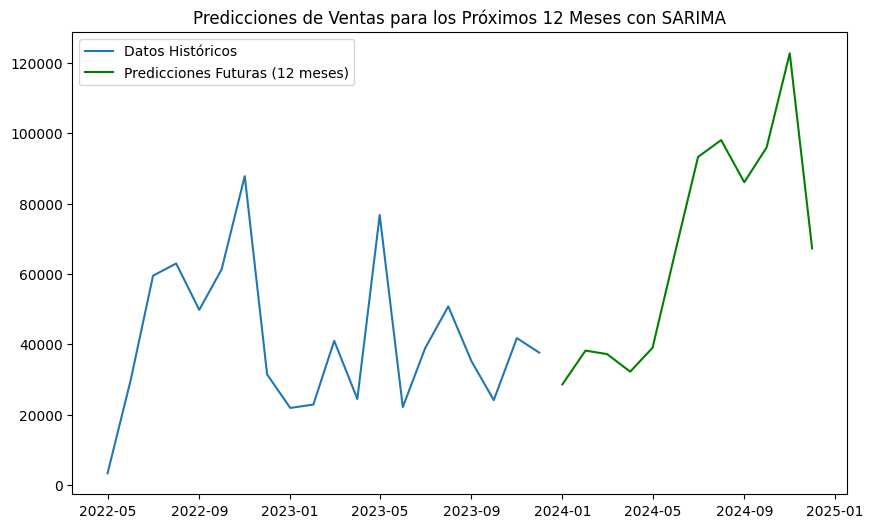

2024-01-01     28624.772470
2024-02-01     38225.429459
2024-03-01     37240.272127
2024-04-01     32246.460707
2024-05-01     39044.305868
2024-06-01     66813.087971
2024-07-01     93271.105726
2024-08-01     98062.426822
2024-09-01     86075.081624
2024-10-01     95987.218079
2024-11-01    122734.259225
2024-12-01     67257.088625
Freq: MS, Name: predicted_mean, dtype: float64

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
from sklearn.metrics import mean_squared_error

# Agrupar las ventas mensuales con el Total
ventas_mensuales = df.groupby(df['Fecha'].dt.to_period('M'))['Total'].sum()
ventas_mensuales.index = ventas_mensuales.index.to_timestamp()

# Visualizar los datos de ventas mensuales
plt.figure(figsize=(10,6))
plt.plot(ventas_mensuales, label='Ventas Mensuales', marker='o', linestyle='-', color='blue')
plt.title('Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Total de Ventas')
plt.grid(True)
plt.show()

# Prueba ADF para verificar estacionariedad
result = adfuller(ventas_mensuales)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Comprobación de estacionariedad
if result[1] < 0.05:
    d = 0
    print("La serie es estacionaria con d=0.")
else:
    print("La serie no es estacionaria con d=1.")
    d = 1

# Determinar el parámetro estacional 's' (en este caso, mensualidad = 12)
s = 12

# Calcular el número de rezagos basado en la longitud de la serie de datos
num_lags = min(10, len(ventas_mensuales) // 2 - 1)

# Graficar ACF y PACF con el número ajustado de rezagos
plt.figure(figsize=(12,6))

# Gráfico de ACF
plt.subplot(121)
plot_acf(ventas_mensuales, ax=plt.gca(), lags=num_lags)
plt.title('ACF (Autocorrelación)')

# Gráfico de PACF
plt.subplot(122)
plot_pacf(ventas_mensuales, ax=plt.gca(), lags=num_lags)
plt.title('PACF (Autocorrelación Parcial)')
plt.tight_layout()
plt.savefig('SArima1.png')
plt.show()

# Calcular valores de ACF y PACF
acf_values = acf(ventas_mensuales, nlags=num_lags)
pacf_values = pacf(ventas_mensuales, nlags=num_lags)

# Encontrar el primer valor donde ACF y PACF cruzan el umbral de significancia
p = next((i for i, val in enumerate(pacf_values) if abs(val) < 0.05), 0)
q = next((i for i, val in enumerate(acf_values) if abs(val) < 0.05), 0)

# Determinar valores estacionales P, D y Q
P = next((i for i, val in enumerate(pacf_values[1:s+1]) if abs(val) < 0.05), 0)
Q = next((i for i, val in enumerate(acf_values[1:s+1]) if abs(val) < 0.05), 0)

# Decidir el valor de D para la diferenciación estacional (comenzando con D=0)
result_seasonal_adf = adfuller(ventas_mensuales.diff(s).dropna())
if result_seasonal_adf[1] < 0.05:
    D = 1
    print("La serie es estacionaria con D=1.")
else:
    D = 0
    print("La serie es estacionaria sin diferenciación estacional. D=0 es adecuado.")

# Mostrar los valores seleccionados de p, d, q, P, D y Q
print(f"Valores seleccionados: p={p}, d={d}, q={q}, P={P}, D={D}, Q={Q}, s={s}")

# Entrenar el modelo SARIMA
model_sarima = SARIMAX(ventas_mensuales, order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit_sarima = model_sarima.fit()

# Resumen del modelo ajustado
print(model_fit_sarima.summary())

# Realizar predicciones para los últimos datos históricos para evaluar el modelo
predictions_sarima = model_fit_sarima.predict(start=0, end=len(ventas_mensuales)-1, dynamic=False)

# Calcular el error de la predicción
rmse_sarima = np.sqrt(mean_squared_error(ventas_mensuales, predictions_sarima))
print(f'RMSE del modelo SARIMA: {rmse_sarima}')

# Visualizar las predicciones frente a los datos históricos
plt.figure(figsize=(10,6))
plt.plot(ventas_mensuales, label='Ventas Históricas', marker='o', linestyle='-', color='blue')
plt.plot(predictions_sarima, color='red', label='Predicciones del Modelo SARIMA' )
plt.legend()
plt.title('Evaluación del Modelo SARIMA - Ventas Históricas vs Predicciones')
plt.savefig('Sarima2.png')
plt.show()

# Realizar predicciones para los próximos 12 meses
forecast_sarima = model_fit_sarima.forecast(steps=12)

# Graficar las predicciones futuras
plt.figure(figsize=(10,6))
plt.plot(ventas_mensuales, label='Datos Históricos')
plt.plot(forecast_sarima, color='green', label='Predicciones Futuras (12 meses)')
plt.legend()
plt.title('Predicciones de Ventas para los Próximos 12 Meses con SARIMA')
plt.savefig('Sarima3.png')
plt.show()
# Mostrar las predicciones de los próximos 12 meses
forecast_sarima

<h1>COMPARACION ARIMA VS SARIMA<h1>

Resultados de la prueba Dickey-Fuller:
Estadístico ADF: -0.6470405030021725
Valor p: 0.8599946957746885
Valores Críticos:
	1%: -4.223238279489106
	5%: -3.189368925619835
	10%: -2.729839421487603
La serie no es estacionaria con d=1.
La serie es estacionaria con D=1.
Valores seleccionados: p=8, d=1, q=7, P=7, D=1, Q=6, s=12


C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All pa

RMSE del modelo ARIMA: 19562.952083849686
RMSE del modelo SARIMA: 27948.310613956255


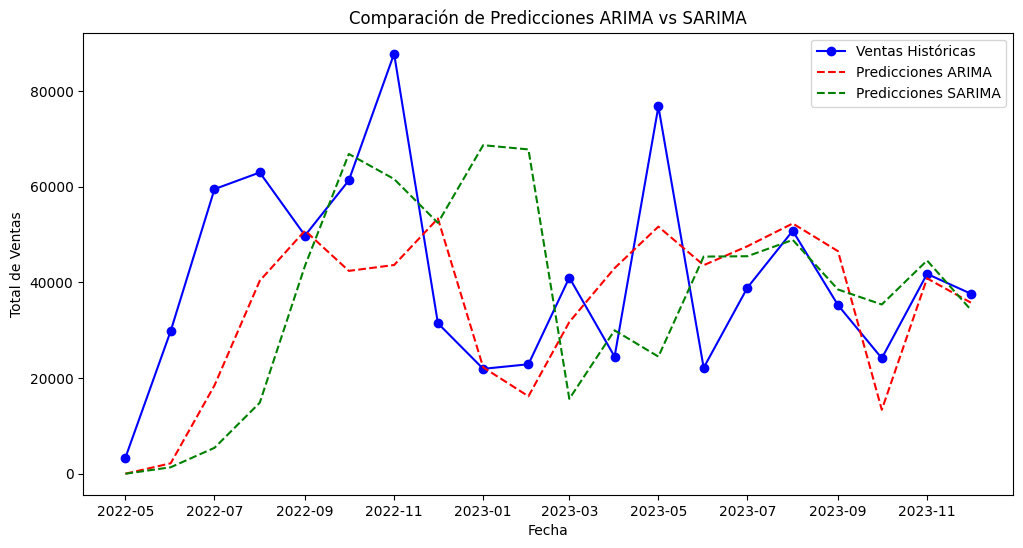

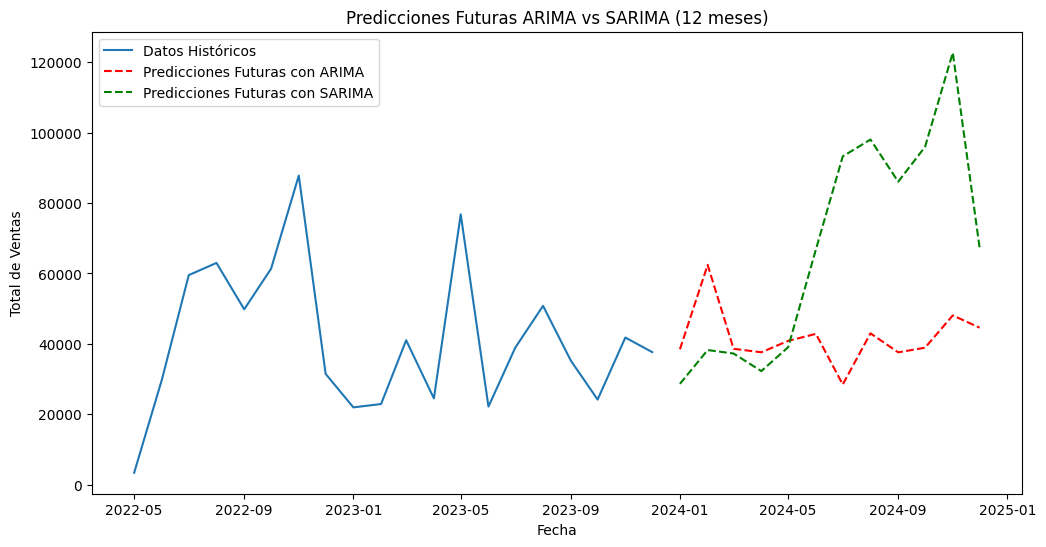

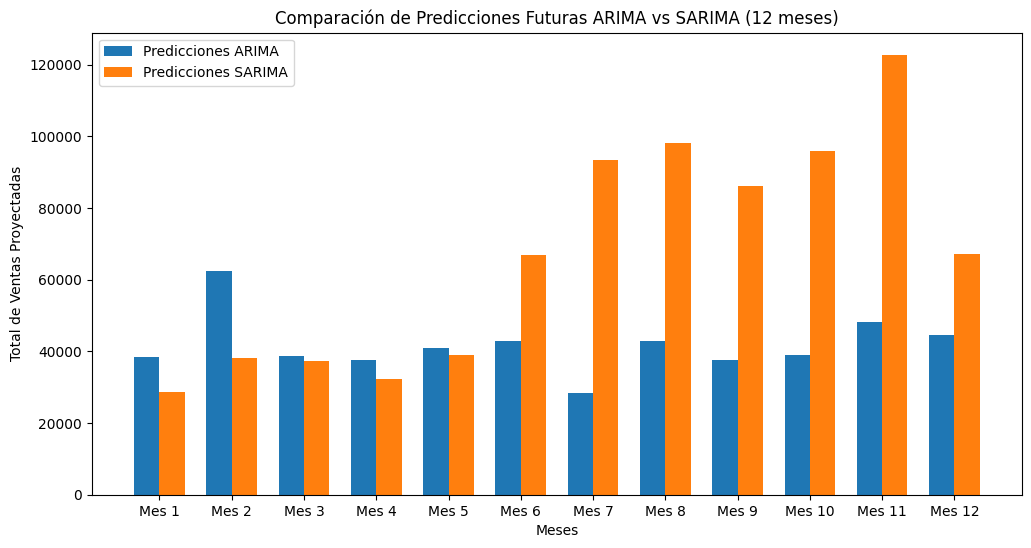

In [14]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Verificar la estacionariedad con la prueba de Dickey-Fuller Aumentada (ADF)
result_adf = adfuller(ventas_mensuales)

# Mostrar los resultados de la prueba ADF
print('Resultados de la prueba Dickey-Fuller:')
print(f'Estadístico ADF: {result_adf[0]}')
print(f'Valor p: {result_adf[1]}')
print('Valores Críticos:')
for key, value in result_adf[4].items():
    print(f'\t{key}: {value}')
# Comprobación de estacionariedad
if result[1] < 0.05:
    d = 0
    print("La serie es estacionaria con d=0.")
else:
    print("La serie no es estacionaria con d=1.")
    d = 1

# Determinar el parámetro estacional 's' (en este caso, mensualidad = 12)
s = 12

# Calcular el número de rezagos basado en la longitud de la serie de datos
num_lags = min(10, len(ventas_mensuales) // 2 - 1)

# Calcular valores de ACF y PACF
acf_values = acf(ventas_mensuales, nlags=num_lags)
pacf_values = pacf(ventas_mensuales, nlags=num_lags)

# Encontrar el primer valor donde ACF y PACF cruzan el umbral de significancia
p = next((i for i, val in enumerate(pacf_values) if abs(val) < 0.05), 0)
q = next((i for i, val in enumerate(acf_values) if abs(val) < 0.05), 0)

# Determinar valores estacionales P, D y Q
P = next((i for i, val in enumerate(pacf_values[1:s+1]) if abs(val) < 0.05), 0)
Q = next((i for i, val in enumerate(acf_values[1:s+1]) if abs(val) < 0.05), 0)

# Decidir el valor de D para la diferenciación estacional (comenzando con D=0)
result_seasonal_adf = adfuller(ventas_mensuales.diff(s).dropna())
if result_seasonal_adf[1] < 0.05:
    D = 1
    print("La serie es estacionaria con D=1.")
else:
    D = 0
    print("La serie es estacionaria sin diferenciación estacional. D=0 es adecuado.")

# Mostrar los valores seleccionados de p, d, q, P, D y Q
print(f"Valores seleccionados: p={p}, d={d}, q={q}, P={P}, D={D}, Q={Q}, s={s}")

# Interpretación de la prueba ADF
#if result_adf[1] <= 0.05:
  #  print("La serie es estacionaria (rechazamos la hipótesis nula)")
#else:
 #   print("La serie no es estacionaria (no se rechaza la hipótesis nula)")

# Definir los parámetros del modelo ARIMA
model_arima = ARIMA(ventas_mensuales, order=(p, d, q))
model_fit_arima = model_arima.fit()

# Definir los parámetros del modelo SARIMA
model_sarima = SARIMAX(ventas_mensuales, order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit_sarima = model_sarima.fit()

# Realizar predicciones con ambos modelos
predictions_arima = model_fit_arima.predict(start=0, end=len(ventas_mensuales)-1, dynamic=False)
predictions_sarima = model_fit_sarima.predict(start=0, end=len(ventas_mensuales)-1, dynamic=False)

# Calcular RMSE para ambos modelos
rmse_arima = np.sqrt(mean_squared_error(ventas_mensuales, predictions_arima))
rmse_sarima = np.sqrt(mean_squared_error(ventas_mensuales, predictions_sarima))

# Mostrar los RMSE de ambos modelos
print(f'RMSE del modelo ARIMA: {rmse_arima}')
print(f'RMSE del modelo SARIMA: {rmse_sarima}')

# Visualizar las predicciones de ambos modelos
plt.figure(figsize=(12, 6))
plt.plot(ventas_mensuales, label='Ventas Históricas', marker='o', linestyle='-', color='blue')
plt.plot(predictions_arima, color='red', linestyle='--', label='Predicciones ARIMA')
plt.plot(predictions_sarima, color='green', linestyle='--', label='Predicciones SARIMA')
plt.title('Comparación de Predicciones ARIMA vs SARIMA')
plt.xlabel('Fecha')
plt.ylabel('Total de Ventas')
plt.legend()
plt.savefig('comparacion1.png')
plt.show()

# Realizar predicciones futuras para los próximos 12 meses con ambos modelos
forecast_arima = model_fit_arima.forecast(steps=12)
forecast_sarima = model_fit_sarima.forecast(steps=12)

# Graficar las predicciones futuras
plt.figure(figsize=(12, 6))
plt.plot(ventas_mensuales, label='Datos Históricos')
plt.plot(forecast_arima, color='red', linestyle='--', label='Predicciones Futuras con ARIMA')
plt.plot(forecast_sarima, color='green', linestyle='--', label='Predicciones Futuras con SARIMA')
plt.title('Predicciones Futuras ARIMA vs SARIMA (12 meses)')
plt.xlabel('Fecha')
plt.ylabel('Total de Ventas')
plt.legend()
plt.savefig('comparacion2.png')
plt.show()
# Mostrar las predicciones de ambos modelos
forecast_arima, forecast_sarima
# Crear un gráfico de barras para comparar las predicciones futuras
labels = [f'Mes {i+1}' for i in range(12)]

plt.figure(figsize=(12, 6))
width = 0.35  # Ancho de las barras

# Gráfico de barras para ARIMA
plt.bar(np.arange(len(forecast_arima)), forecast_arima, width=width, label='Predicciones ARIMA', align='center')

# Gráfico de barras para SARIMA
plt.bar(np.arange(len(forecast_sarima)) + width, forecast_sarima, width=width, label='Predicciones SARIMA', align='center')

# Etiquetas y leyenda
plt.xlabel('Meses')
plt.ylabel('Total de Ventas Proyectadas')
plt.title('Comparación de Predicciones Futuras ARIMA vs SARIMA (12 meses)')
plt.xticks(np.arange(len(forecast_arima)) + width / 2, labels)
plt.legend()
plt.savefig('comparacion3.png')
# Mostrar el gráfico
plt.show()


<h5>ANALISIS CON VALORES LOGARITMICOS<h5>
MODELO ARIMA

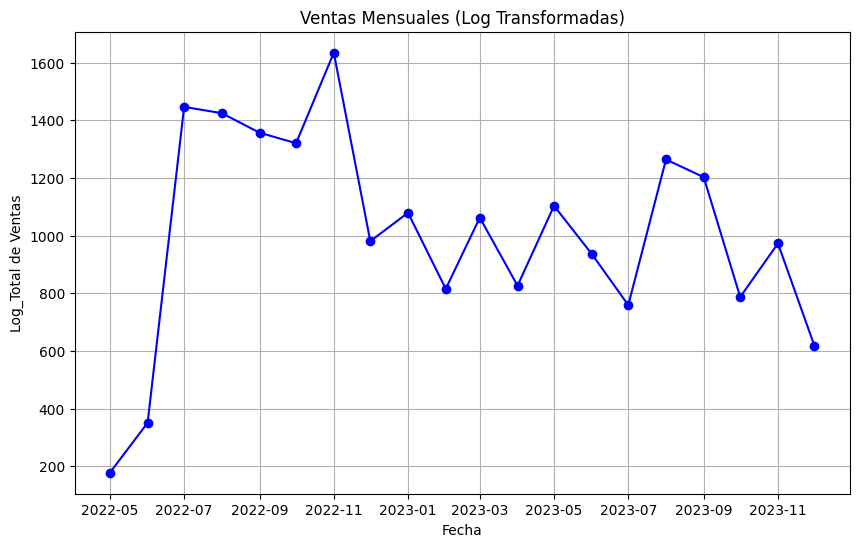

ADF Statistic: -3.425846
p-value: 0.010109
Critical Values:
	1%: -3.833
	5%: -3.031
	10%: -2.656
La serie es estacionaria (rechazamos la hipótesis nula).


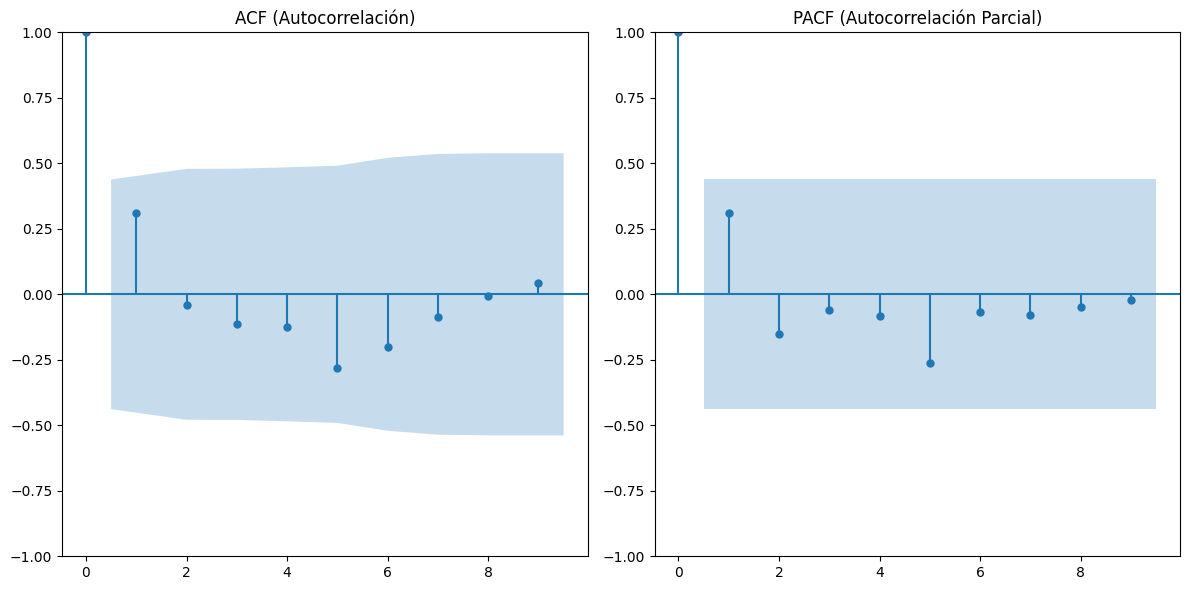

Valores seleccionados: p=9, d=0, q=2


C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:              Log_Total   No. Observations:                   20
Model:                 ARIMA(9, 0, 2)   Log Likelihood                -146.428
Date:                Wed, 13 Nov 2024   AIC                            318.855
Time:                        12:19:40   BIC                            331.800
Sample:                    05-01-2022   HQIC                           321.382
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1009.8361      0.002   4.69e+05      0.000    1009.832    1009.840
ar.L1          0.3411      0.217      1.572      0.116      -0.084       0.766
ar.L2          0.7645      0.216      3.539      0.0

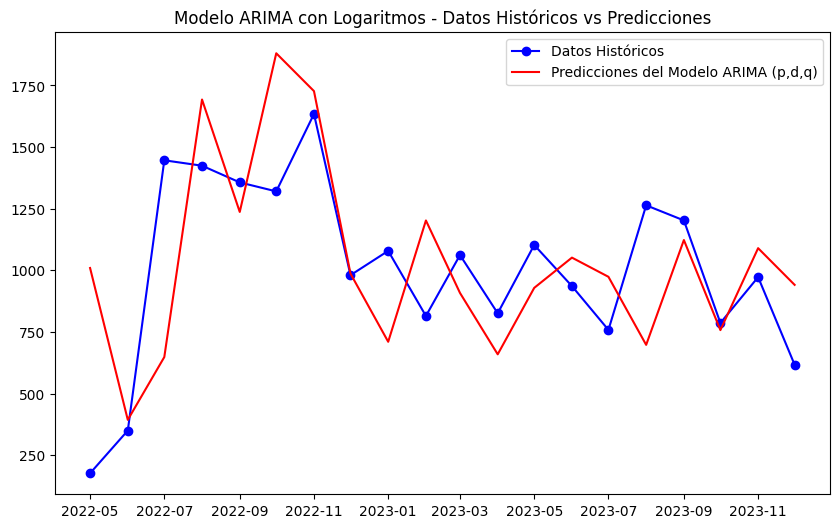

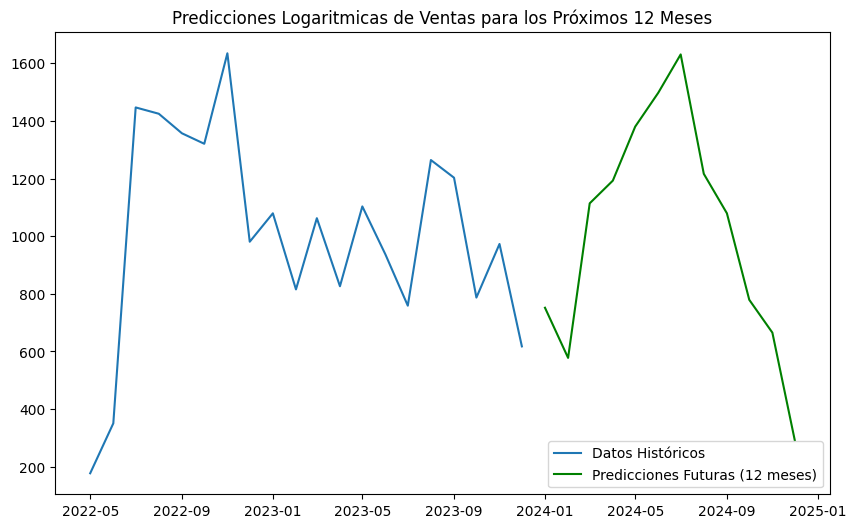

In [15]:
# Asegurarse de que los datos tengan la columna 'Fecha' en formato datetime
df_log['Fecha'] = pd.to_datetime(df_log['Fecha'])

# Agrupar las ventas mensuales con el Log_Total
ventas_mensuales_log = df_log.groupby(df_log['Fecha'].dt.to_period('M'))['Log_Total'].sum()
ventas_mensuales_log.index = ventas_mensuales_log.index.to_timestamp()

# Visualizar los datos de ventas mensuales transformados
plt.figure(figsize=(10,6))
plt.plot(ventas_mensuales_log,label='Ventas Mensuales',marker='o', linestyle='-', color='blue')
plt.title('Ventas Mensuales (Log Transformadas)')
plt.xlabel('Fecha')
plt.ylabel('Log_Total de Ventas')
plt.grid(True)
plt.show()

# Prueba ADF para verificar estacionariedad
result_log = adfuller(ventas_mensuales_log)
print('ADF Statistic: %f' % result_log[0])
print('p-value: %f' % result_log[1])
print('Critical Values:')
for key, value in result_log[4].items():
    print('\t%s: %.3f' % (key, value))
# Comprobación de estacionariedad
if result_log[1] < 0.05:
    d=0
    print("La serie es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La serie no es estacionaria (no podemos rechazar la hipótesis nula).")
    d=1
# Verificar la longitud de la serie temporal
n_points_log = len(ventas_mensuales_log)
max_lags_log = int(n_points_log // 2) - 1  # El número máximo de rezagos permitidos

# Usar el menor entre 10 o el número máximo de rezagos permitidos
num_lags_log = min(10, max_lags_log)

# Graficar ACF y PACF con el número ajustado de rezagos
plt.figure(figsize=(12,6))

# Gráfico de ACF
plt.subplot(121)
plot_acf(ventas_mensuales_log, ax=plt.gca(), lags=num_lags_log)
plt.title('ACF (Autocorrelación)')

# Gráfico de PACF
plt.subplot(122)
plot_pacf(ventas_mensuales_log, ax=plt.gca(), lags=num_lags_log)
plt.title('PACF (Autocorrelación Parcial)')
plt.tight_layout()
plt.savefig('ArimaLog0.png')
plt.show()

# Calcular los valores de ACF y PACF
acf_values_log = acf(ventas_mensuales_log, nlags=num_lags_log)
pacf_values_log = pacf(ventas_mensuales_log, nlags=num_lags_log)

# Encontrar el primer valor donde ACF y PACF cruzan el umbral de significancia (donde se acercan a 0)
p = next((i for i, val in enumerate(pacf_values_log) if abs(val) < 0.05), 0)
q = next((i for i, val in enumerate(acf_values_log) if abs(val) < 0.05), 0)

# Mostrar los valores seleccionados de p, d y q
print(f"Valores seleccionados: p={p}, d={d}, q={q}")

# Entrenar el modelo ARIMA(p,d,q) sobre las ventas mensuales con Log_Total
model_arima_log = ARIMA(ventas_mensuales_log, order=(p, d, q))
model_fit_log = model_arima_log.fit()

# Resumen del modelo ajustado
print(model_fit_log.summary())

# Realizar predicciones para los últimos datos históricos para evaluar el modelo
predictions_log = model_fit_log.predict(start=0, end=len(ventas_mensuales_log)-1, dynamic=False)

# Calcular el error de la predicción
rmse_log = np.sqrt(mean_squared_error(ventas_mensuales_log, predictions_log))
print(f'RMSE del modelo: {rmse_log}')

# Visualizar las predicciones frente a los datos históricos
plt.figure(figsize=(10,6))
plt.plot(ventas_mensuales_log, label='Datos Históricos', marker='o', linestyle='-', color='blue')
plt.plot(predictions_log, color='red', label='Predicciones del Modelo ARIMA (p,d,q)' )
plt.legend()
plt.title('Modelo ARIMA con Logaritmos - Datos Históricos vs Predicciones')
plt.savefig('ArimaLog1.png')
plt.show()

# Realizar predicciones para los próximos 12 meses
forecast_log = model_fit_log.forecast(steps=12)

# Graficar las predicciones futuras
plt.figure(figsize=(10,6))
plt.plot(ventas_mensuales_log, label='Datos Históricos')
plt.plot(forecast_log, color='green', label='Predicciones Futuras (12 meses)')
plt.legend()
plt.title('Predicciones Logaritmicas de Ventas para los Próximos 12 Meses')
plt.savefig('ArimaLog2.png')
plt.show()



<h5>MODELO SARIMA<h5>

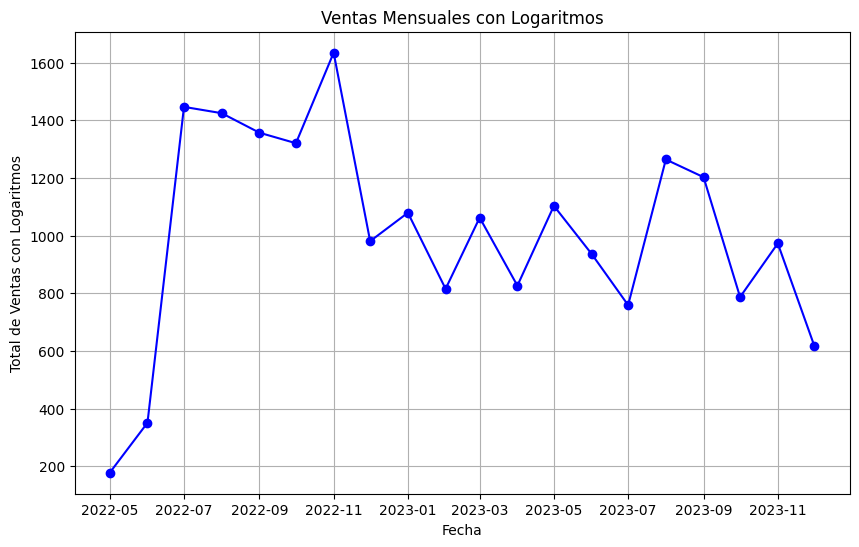

ADF Statistic: -3.425846
p-value: 0.010109
Critical Values:
	1%: -3.833
	5%: -3.031
	10%: -2.656
La serie es estacionaria d=0.


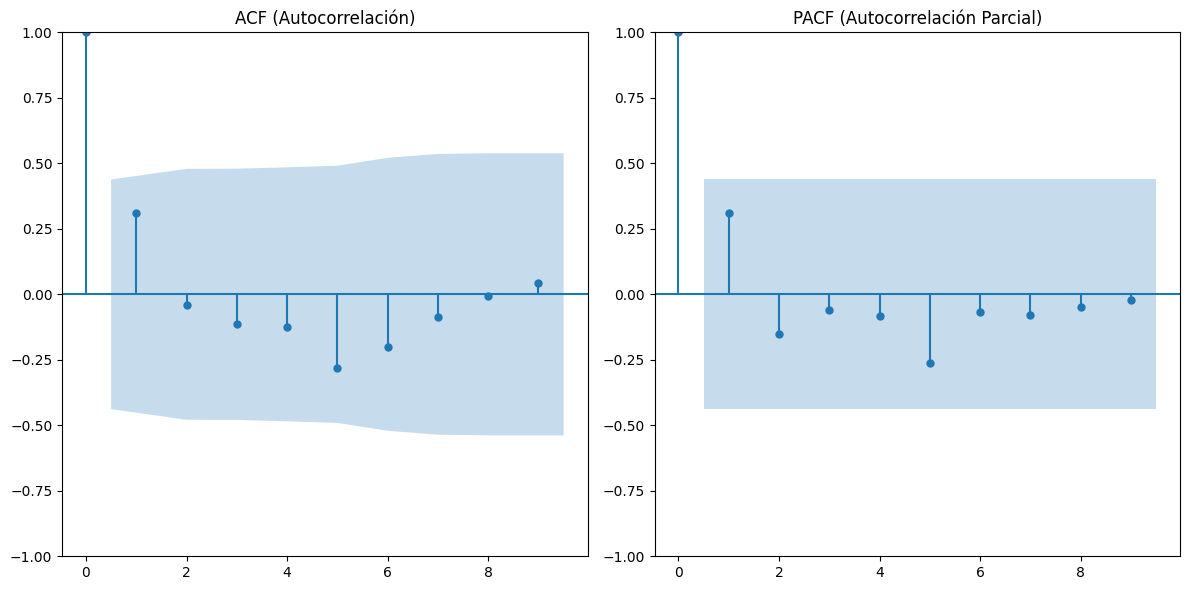

Valores seleccionados: p=9, d=0, q=2, P=8, D=1, Q=1, s=12


C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                            Log_Total   No. Observations:                   20
Model:             SARIMAX(9, 0, 2)x(8, 1, [1], 12)   Log Likelihood                 -57.937
Date:                              Wed, 13 Nov 2024   AIC                            157.873
Time:                                      12:20:43   BIC                            159.542
Sample:                                  05-01-2022   HQIC                           146.622
                                       - 12-01-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0346      7.283      0.005      0.996     -14.239      14.309
ar.L2          0.89

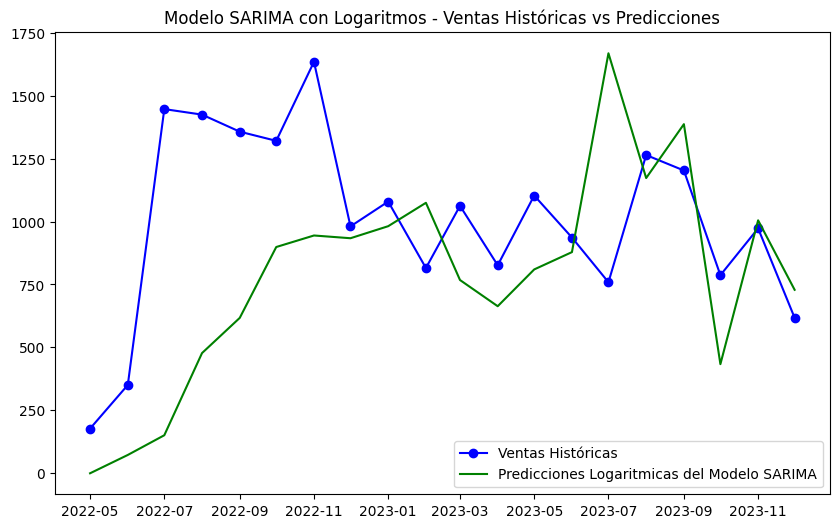

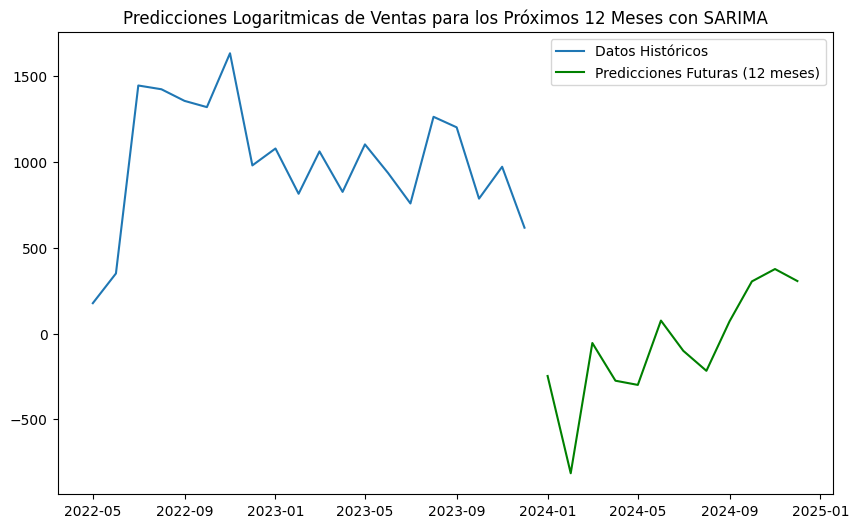

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# Visualizar los datos de ventas mensuales
plt.figure(figsize=(10,6))
plt.plot(ventas_mensuales_log, label='Ventas Mensuales', marker='o', linestyle='-', color='blue')
plt.title('Ventas Mensuales con Logaritmos')
plt.xlabel('Fecha')
plt.ylabel('Total de Ventas con Logaritmos')
plt.grid(True)
plt.show()

# Prueba ADF para verificar estacionariedad
result_log = adfuller(ventas_mensuales_log)
print('ADF Statistic: %f' % result_log[0])
print('p-value: %f' % result_log[1])
print('Critical Values:')
for key, value in result_log[4].items():
    print('\t%s: %.3f' % (key, value))

# Comprobación de estacionariedad
if result_log[1] < 0.05:
    d = 0
    print("La serie es estacionaria d=0.")
else:
    print("La serie no es estacionaria d=1.")
    d = 1

# Determinar el parámetro estacional 's' (en este caso, mensualidad = 12)
s = 12

# Calcular el número de rezagos basado en la longitud de la serie de datos
num_lags_log = min(10, len(ventas_mensuales_log) // 2 - 1)

# Graficar ACF y PACF con el número ajustado de rezagos
plt.figure(figsize=(12,6))

# Gráfico de ACF
plt.subplot(121)
plot_acf(ventas_mensuales_log, ax=plt.gca(), lags=num_lags_log)
plt.title('ACF (Autocorrelación)')

# Gráfico de PACF
plt.subplot(122)
plot_pacf(ventas_mensuales_log, ax=plt.gca(), lags=num_lags_log)
plt.title('PACF (Autocorrelación Parcial)')
plt.tight_layout()
plt.show()

# Calcular valores de ACF y PACF
acf_values_log = acf(ventas_mensuales_log, nlags=num_lags_log)
pacf_values_log = pacf(ventas_mensuales_log, nlags=num_lags_log)

# Encontrar el primer valor donde ACF y PACF cruzan el umbral de significancia
p = next((i for i, val in enumerate(pacf_values_log) if abs(val) < 0.05), 0)
q = next((i for i, val in enumerate(acf_values_log) if abs(val) < 0.05), 0)

# Determinar valores estacionales P, D y Q
P = next((i for i, val in enumerate(pacf_values_log[1:s+1]) if abs(val) < 0.05), 0)
Q = next((i for i, val in enumerate(acf_values_log[1:s+1]) if abs(val) < 0.05), 0)
D=1

# Mostrar los valores seleccionados de p, d, q, P, D y Q
print(f"Valores seleccionados: p={p}, d={d}, q={q}, P={P}, D={D}, Q={Q}, s={s}")

# Entrenar el modelo SARIMA
model_sarima_log = SARIMAX(ventas_mensuales_log, order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit_sarima_log = model_sarima_log.fit()


# Resumen del modelo ajustado
print(model_fit_sarima_log.summary())

# Realizar predicciones para los últimos datos históricos para evaluar el modelo
predictions_sarima_log = model_fit_sarima_log.predict(start=0, end=len(ventas_mensuales_log)-1, dynamic=False)

# Calcular el error de la predicción
rmse_sarima_log = np.sqrt(mean_squared_error(ventas_mensuales_log, predictions_sarima_log))
print(f'RMSE del modelo SARIMA: {rmse_sarima_log}')

# Visualizar las predicciones frente a los datos históricos
plt.figure(figsize=(10,6))
plt.plot(ventas_mensuales_log, label='Ventas Históricas', marker='o', linestyle='-', color='blue')
plt.plot(predictions_sarima_log, color='green', label='Predicciones Logaritmicas del Modelo SARIMA' )
plt.legend()
plt.title('Modelo SARIMA con Logaritmos - Ventas Históricas vs Predicciones')
plt.savefig('Sarimalog1.png')
plt.show()

# Realizar predicciones para los próximos 12 meses
forecast_sarima_log= model_fit_sarima_log.forecast(steps=12)

# Graficar las predicciones futuras
plt.figure(figsize=(10,6))
plt.plot(ventas_mensuales_log, label='Datos Históricos')
plt.plot(forecast_sarima_log, color='green', label='Predicciones Futuras (12 meses)')
plt.legend()
plt.title('Predicciones Logaritmicas de Ventas para los Próximos 12 Meses con SARIMA')
plt.savefig('Sarimalog2.png')
plt.show()


<h1>COMPARACION ARIMA VS SARIMA<h1>

Resultados de la prueba Dickey-Fuller:
Estadístico ADF: -3.425846379872973
Valor p: 0.010108700088047238
Valores Críticos:
	1%: -3.8326031418574136
	5%: -3.0312271701414204
	10%: -2.655519584487535
La serie es estacionaria con d=0.
Valores seleccionados: p=9, d=0, q=2, P=8, D=1, Q=1, s=12


C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to

RMSE del modelo ARIMA: 361.4530932872242
RMSE del modelo SARIMA: 508.6557624331322


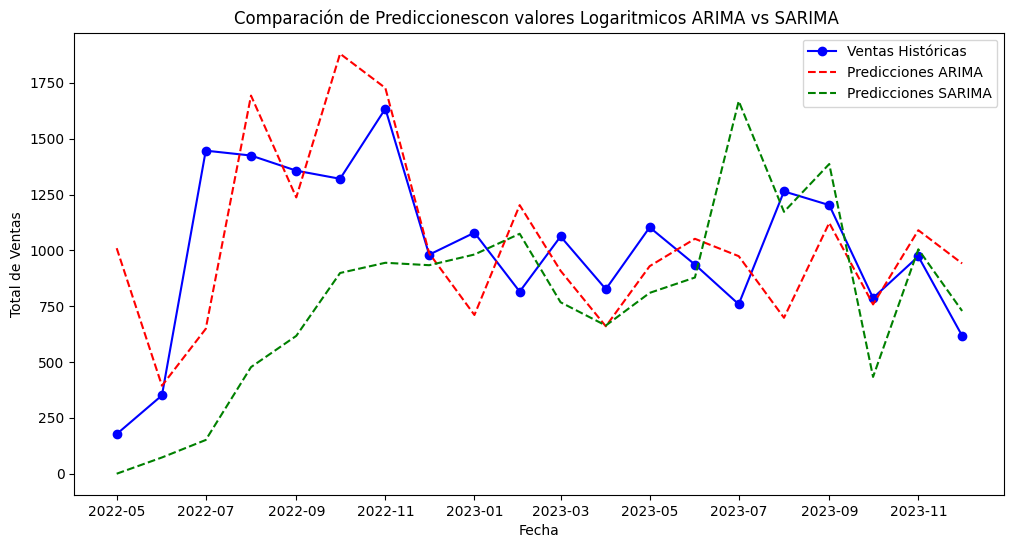

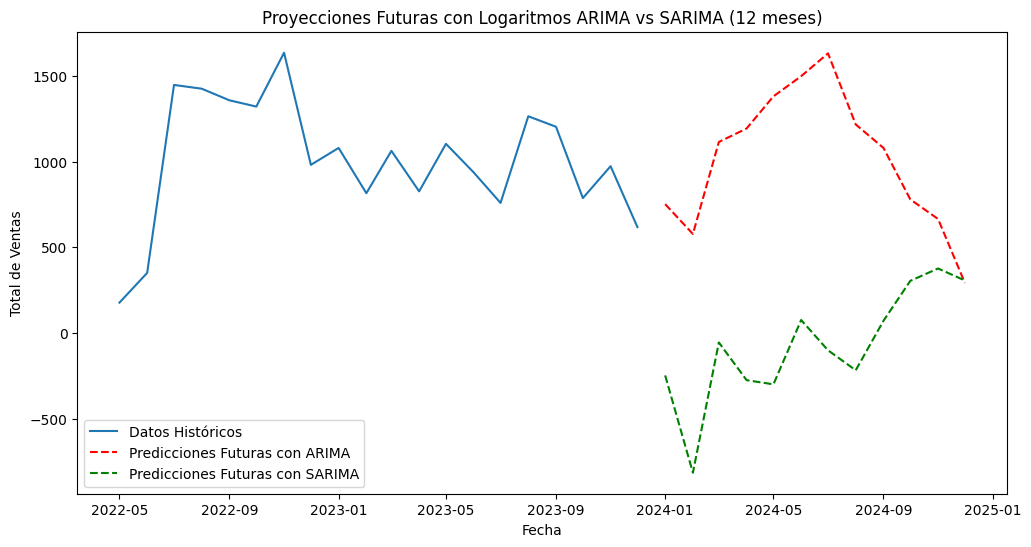

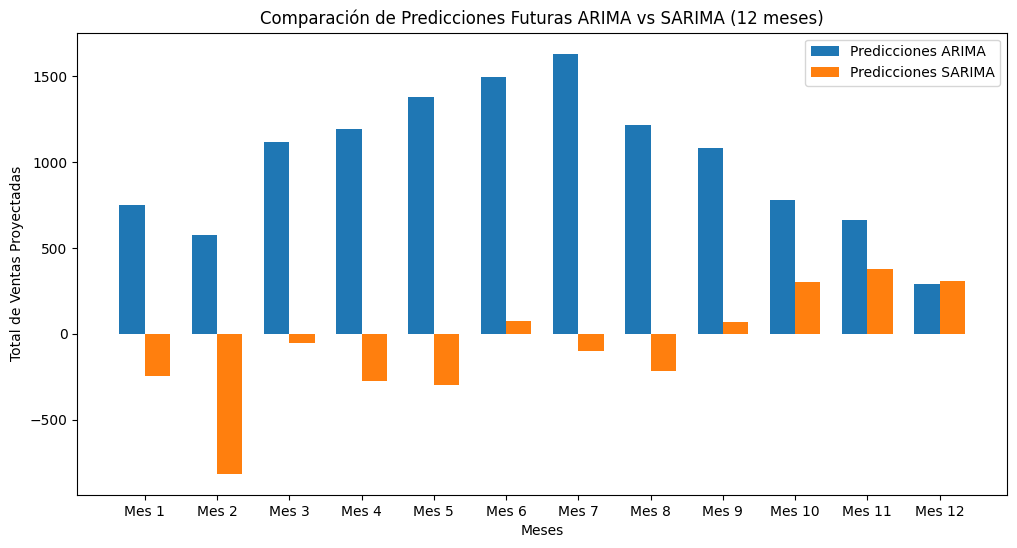

In [17]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Verificar la estacionariedad con la prueba de Dickey-Fuller Aumentada (ADF)
result_adf_log = adfuller(ventas_mensuales_log)

# Mostrar los resultados de la prueba ADF
print('Resultados de la prueba Dickey-Fuller:')
print(f'Estadístico ADF: {result_adf_log[0]}')
print(f'Valor p: {result_adf_log[1]}')
print('Valores Críticos:')
for key, value in result_adf_log[4].items():
    print(f'\t{key}: {value}')
# Comprobación de estacionariedad
if result_adf_log[1] < 0.05:
    d = 0
    print("La serie es estacionaria con d=0.")
else:
    print("La serie no es estacionaria con d=1.")
    d = 1

# Determinar el parámetro estacional 's' (en este caso, mensualidad = 12)
s = 12

# Calcular el número de rezagos basado en la longitud de la serie de datos
num_lags = min(10, len(ventas_mensuales_log) // 2 - 1)

# Calcular valores de ACF y PACF
acf_values = acf(ventas_mensuales_log, nlags=num_lags)
pacf_values = pacf(ventas_mensuales_log, nlags=num_lags)

# Encontrar el primer valor donde ACF y PACF cruzan el umbral de significancia
p = next((i for i, val in enumerate(pacf_values) if abs(val) < 0.05), 0)
q = next((i for i, val in enumerate(acf_values) if abs(val) < 0.05), 0)

# Determinar valores estacionales P, D y Q
P = next((i for i, val in enumerate(pacf_values[1:s+1]) if abs(val) < 0.05), 0)
Q = next((i for i, val in enumerate(acf_values[1:s+1]) if abs(val) < 0.05), 0)
D=1
# Mostrar los valores seleccionados de p, d, q, P, D y Q
print(f"Valores seleccionados: p={p}, d={d}, q={q}, P={P}, D={D}, Q={Q}, s={s}")

# Definir los parámetros del modelo ARIMA
model_arima_log = ARIMA(ventas_mensuales_log, order=(p, d, q))
model_fit_arima_log = model_arima_log.fit()

# Definir los parámetros del modelo SARIMA
model_sarima_log = SARIMAX(ventas_mensuales_log, order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit_sarima_log = model_sarima_log.fit()

# Realizar predicciones con ambos modelos
predictions_arima_log = model_fit_arima_log.predict(start=0, end=len(ventas_mensuales_log)-1, dynamic=False)
predictions_sarima_log = model_fit_sarima_log.predict(start=0, end=len(ventas_mensuales_log)-1, dynamic=False)

# Calcular RMSE para ambos modelos
rmse_arima_log= np.sqrt(mean_squared_error(ventas_mensuales_log, predictions_arima_log))
rmse_sarima_log= np.sqrt(mean_squared_error(ventas_mensuales_log, predictions_sarima_log))

# Mostrar los RMSE de ambos modelos
print(f'RMSE del modelo ARIMA: {rmse_arima_log}')
print(f'RMSE del modelo SARIMA: {rmse_sarima_log}')

# Visualizar las predicciones de ambos modelos
plt.figure(figsize=(12, 6))
plt.plot(ventas_mensuales_log, label='Ventas Históricas', marker='o', linestyle='-', color='blue')
plt.plot(predictions_arima_log, color='red', linestyle='--', label='Predicciones ARIMA')
plt.plot(predictions_sarima_log, color='green', linestyle='--', label='Predicciones SARIMA')
plt.title('Comparación de Prediccionescon valores Logaritmicos ARIMA vs SARIMA ')
plt.xlabel('Fecha')
plt.ylabel('Total de Ventas')
plt.legend()
plt.savefig('comparacion4.png')
plt.show()

# Realizar predicciones futuras para los próximos 12 meses con ambos modelos
forecast_arima_log = model_fit_arima_log.forecast(steps=12)
forecast_sarima_log = model_fit_sarima_log.forecast(steps=12)

# Graficar las predicciones futuras
plt.figure(figsize=(12, 6))
plt.plot(ventas_mensuales_log, label='Datos Históricos')
plt.plot(forecast_arima_log, color='red', linestyle='--', label='Predicciones Futuras con ARIMA')
plt.plot(forecast_sarima_log, color='green', linestyle='--', label='Predicciones Futuras con SARIMA')
plt.title('Proyecciones Futuras con Logaritmos ARIMA vs SARIMA (12 meses)')
plt.xlabel('Fecha')
plt.ylabel('Total de Ventas')
plt.legend()
plt.savefig('comparacion5.png')
plt.show()
# Mostrar las predicciones de ambos modelos
forecast_arima_log, forecast_sarima_log
# Crear un gráfico de barras para comparar las predicciones futuras
labels = [f'Mes {i+1}' for i in range(12)]

plt.figure(figsize=(12, 6))
width = 0.35  # Ancho de las barras

# Gráfico de barras para ARIMA
plt.bar(np.arange(len(forecast_arima_log)), forecast_arima_log, width=width, label='Predicciones ARIMA', align='center')

# Gráfico de barras para SARIMA
plt.bar(np.arange(len(forecast_sarima_log)) + width, forecast_sarima_log, width=width, label='Predicciones SARIMA', align='center')

# Etiquetas y leyenda
plt.xlabel('Meses')
plt.ylabel('Total de Ventas Proyectadas')
plt.title('Comparación de Predicciones Futuras ARIMA vs SARIMA (12 meses)')
plt.xticks(np.arange(len(forecast_arima_log)) + width / 2, labels)
plt.legend()
plt.savefig('comparacion6.png')
# Mostrar el gráfico
plt.show()


MODELO ARIMA PARA DEMANDA DE PRODUCTOS

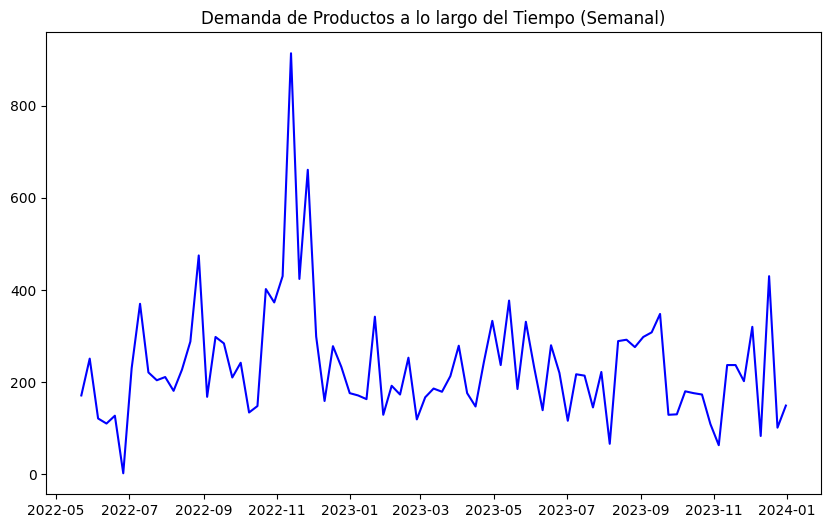

ADF Statistic: -4.015820
p-value: 0.001330


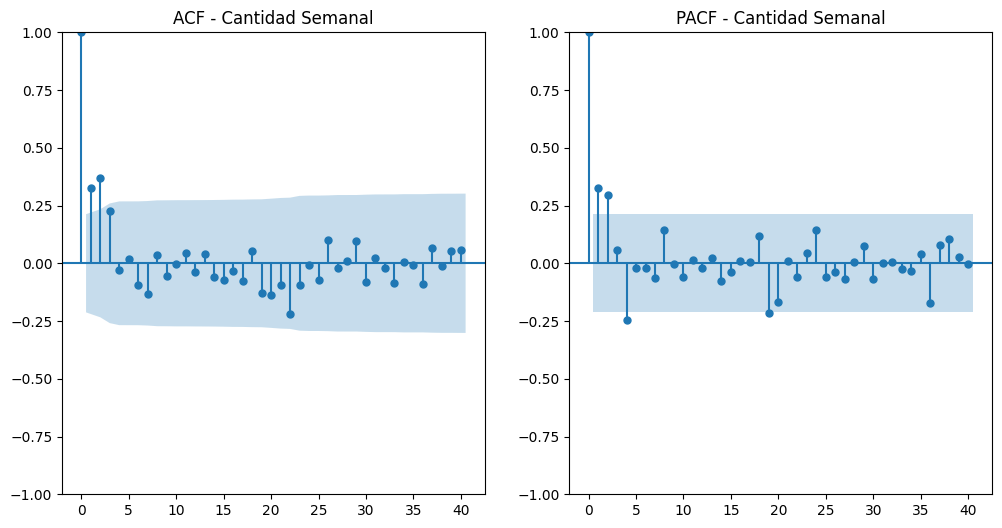

Valores seleccionados: p=5, d=0, q=4


C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:               Cantidad   No. Observations:                   85
Model:                 ARIMA(5, 0, 4)   Log Likelihood                -516.796
Date:                Wed, 13 Nov 2024   AIC                           1055.592
Time:                        12:21:52   BIC                           1082.461
Sample:                    05-22-2022   HQIC                          1066.399
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        235.2789     28.839      8.158      0.000     178.755     291.802
ar.L1          0.1595      0.211      0.757      0.449      -0.254       0.573
ar.L2          0.1985      0.117      1.692      0.0

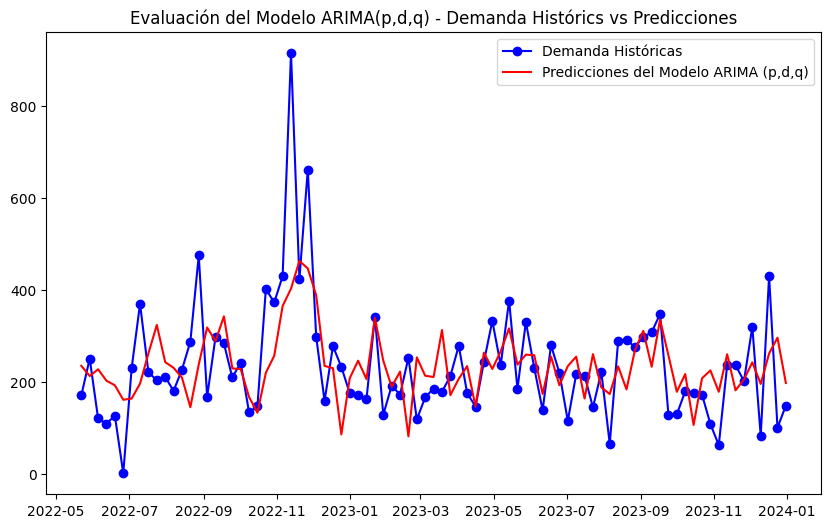

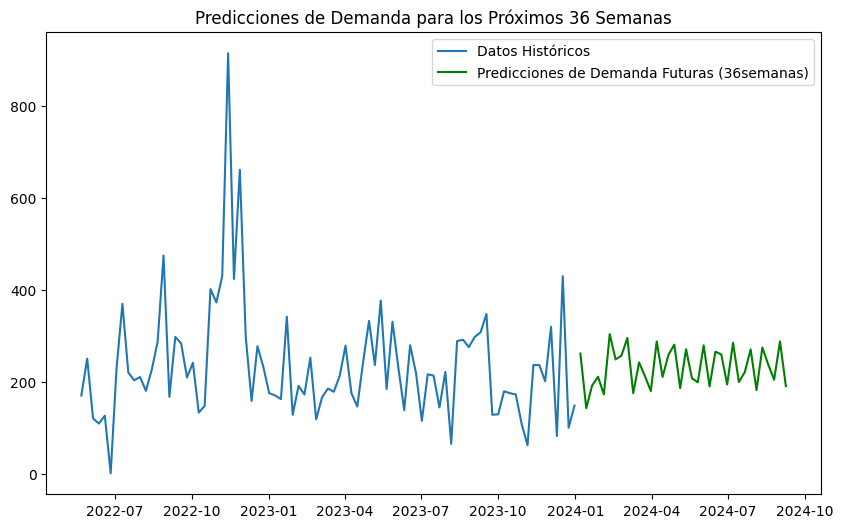

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Asegúrate de que 'Fecha' esté como índice 
df.set_index('Fecha', inplace=True)

# Paso 1: Agrupar las ventas por semana
df_semanal = df['Cantidad'].resample('W').sum()

# Graficar la cantidad vendida (demanda) a lo largo del tiempo (semanal)
plt.figure(figsize=(10, 6))
plt.plot(df_semanal, color='blue')
plt.title('Demanda de Productos a lo largo del Tiempo (Semanal)')
plt.savefig('INVENTARIO1.png')
plt.show()

# Paso 2: Verificar la estacionariedad de la serie con la prueba ADF
result = adfuller(df_semanal)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Si la serie no es estacionaria (p-value > 0.05), aplicar una diferenciación
if result[1] > 0.05:
    df_semanal_diff = df_semanal.diff().dropna()
    data_to_use = df_semanal_diff
    d = 1
else:
    data_to_use = df_semanal
    d = 0

# Paso 3: Graficar ACF y PACF para determinar p y q
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data_to_use, ax=plt.gca(), lags=40)
plt.title('ACF - Cantidad Semanal')
plt.subplot(122)
plot_pacf(data_to_use, ax=plt.gca(), lags=40)
plt.title('PACF - Cantidad Semanal')
plt.savefig('INVENTARIO2.png')
plt.show()

# Calcular los valores de ACF y PACF
acf_values = acf(data_to_use, nlags=40)
pacf_values = pacf(data_to_use, nlags=40)

# Encontrar el primer valor donde ACF y PACF cruzan el umbral de significancia
p = next((i for i, val in enumerate(pacf_values) if abs(val) < 0.05), 0)
q = next((i for i, val in enumerate(acf_values) if abs(val) < 0.05), 0)

# Mostrar los valores seleccionados de p, d y q
print(f"Valores seleccionados: p={p}, d={d}, q={q}")

# Entrenar el modelo ARIMA(p,d,q) sobre las ventas mensuales con Log_Total
model_arima2 = ARIMA(df_semanal, order=(p, d, q))
model_fit2 = model_arima2.fit()

# Resumen del modelo ajustado
print(model_fit2.summary())

# Realizar predicciones para los últimos datos históricos para evaluar el modelo
predictions_arima2 = model_fit2.predict(start=0, end=len(df_semanal)-1, dynamic=False)

# Calcular el error de la predicción
rmse_arima2 = np.sqrt(mean_squared_error(df_semanal, predictions_arima2))
mae_arima2 = mean_absolute_error(df_semanal, predictions_arima2)
print(f'RMSE del modelo: {rmse_arima2}')
print(f'MAE del modelo: {mae_arima2}')

# Visualizar las predicciones frente a los datos históricos
plt.figure(figsize=(10,6))
plt.plot(df_semanal, label='Demanda Históricas', marker='o', linestyle='-', color='blue')
plt.plot(predictions_arima2, color='red', label='Predicciones del Modelo ARIMA (p,d,q)' )
plt.legend()
plt.title('Evaluación del Modelo ARIMA(p,d,q) - Demanda Histórics vs Predicciones')
plt.savefig('inventario3.png')
plt.show()

# Realizar predicciones para las próximas 36 semanas
forecast_arima2 = model_fit2.forecast(steps=36)

# Graficar las predicciones futuras
plt.figure(figsize=(10,6))
plt.plot(df_semanal, label='Datos Históricos')
plt.plot(forecast_arima2, color='green', label='Predicciones de Demanda Futuras (36semanas)')
plt.legend()
plt.title('Predicciones de Demanda para los Próximos 36 Semanas')
plt.savefig('inventario4.png')
plt.show()

MODELO SARIMA PARA DEMANDA DE PRODUCTOS

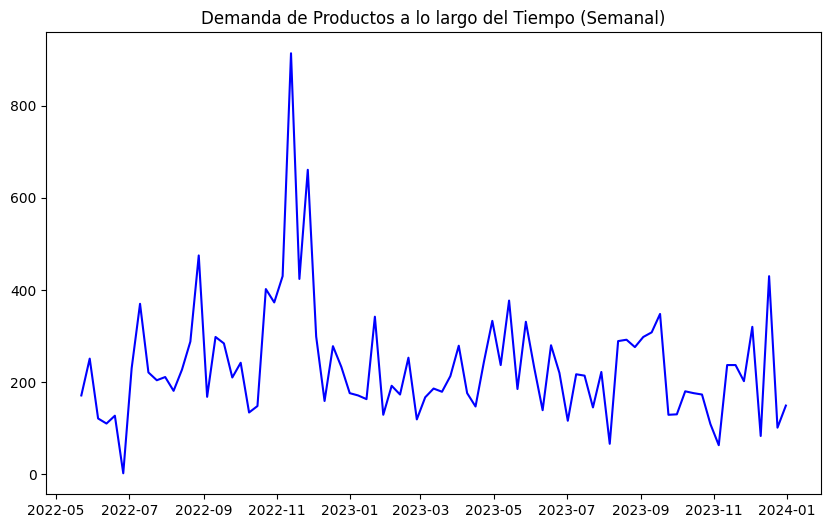

ADF Statistic: -4.015820
p-value: 0.001330


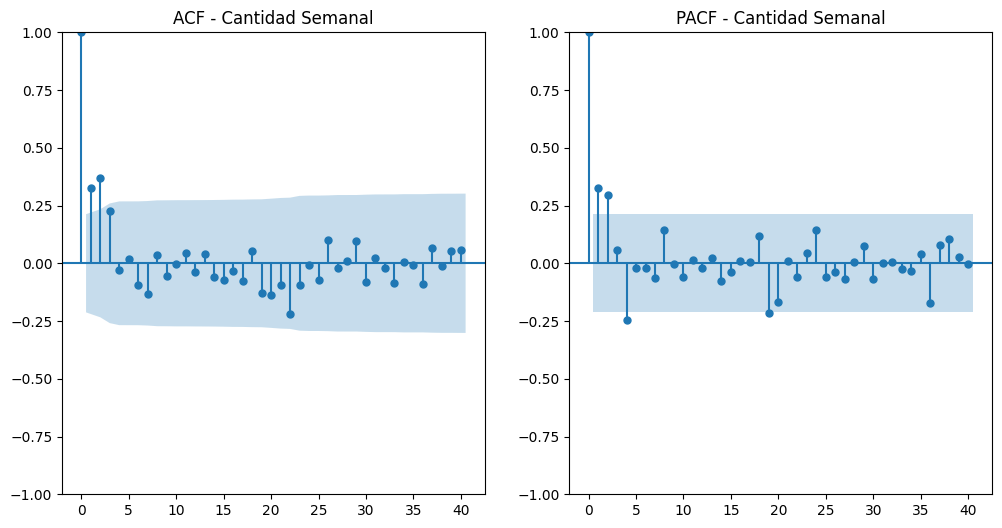

Valores seleccionados: p=5, d=0, q=4, P=4, D=0, Q=3, s=52


C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization 

                                         SARIMAX Results                                          
Dep. Variable:                                   Cantidad   No. Observations:                   85
Model:             SARIMAX(5, 0, 4)x(4, 0, [1, 2, 3], 52)   Log Likelihood                -525.475
Date:                                    Wed, 13 Nov 2024   AIC                           1084.949
Time:                                            12:29:06   BIC                           1126.474
Sample:                                        05-22-2022   HQIC                          1101.652
                                             - 12-31-2023                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5564      1.109     -0.502      0

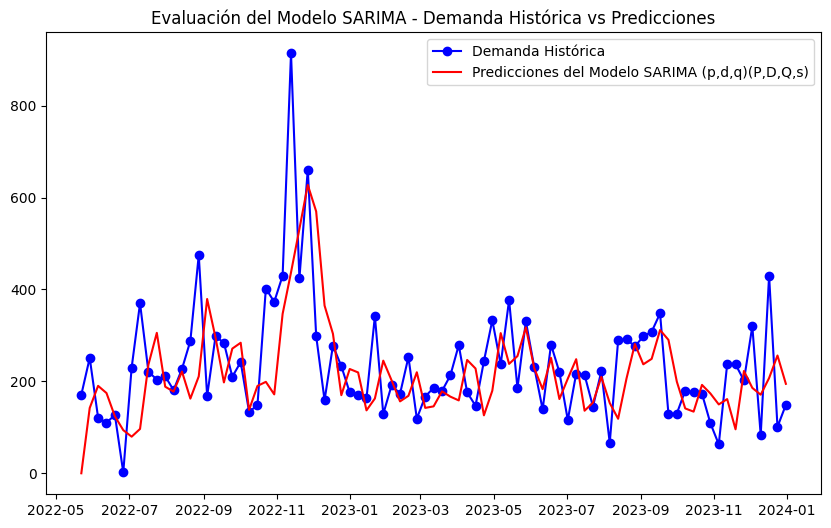

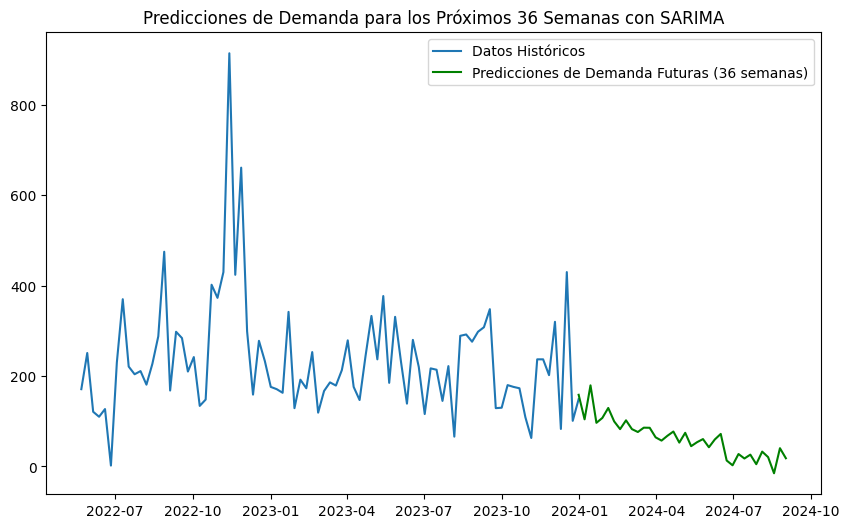

In [19]:
# Asegúrate de que 'Fecha' esté como índice
#df.set_index('Fecha', inplace=True)

# Paso 1: Agrupar las ventas por semana
df_semanal = df['Cantidad'].resample('W').sum()

# Graficar la cantidad vendida (demanda) a lo largo del tiempo (semanal)
plt.figure(figsize=(10, 6))
plt.plot(df_semanal, color='blue')
plt.title('Demanda de Productos a lo largo del Tiempo (Semanal)')
plt.savefig('INVENTARIO1.png')
plt.show()

# Paso 2: Verificar la estacionariedad de la serie con la prueba ADF
result = adfuller(df_semanal)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Si la serie no es estacionaria (p-value > 0.05), aplicar una diferenciación
if result[1] > 0.05:
    df_semanal_diff = df_semanal.diff().dropna()
    data_to_use = df_semanal_diff
    d = 1
else:
    data_to_use = df_semanal
    d = 0

# Paso 3: Graficar ACF y PACF para determinar p y q
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data_to_use, ax=plt.gca(), lags=40)
plt.title('ACF - Cantidad Semanal')
plt.subplot(122)
plot_pacf(data_to_use, ax=plt.gca(), lags=40)
plt.title('PACF - Cantidad Semanal')
plt.savefig('INVENTARIO2.png')
plt.show()

# Calcular los valores de ACF y PACF
acf_values = acf(data_to_use, nlags=40)
pacf_values = pacf(data_to_use, nlags=40)

# Encontrar el primer valor donde ACF y PACF cruzan el umbral de significancia
p = next((i for i, val in enumerate(pacf_values) if abs(val) < 0.05), 0)
q = next((i for i, val in enumerate(acf_values) if abs(val) < 0.05), 0)

# Determinar los componentes estacionales P, D, Q y s
s = 52  # Periodicidad estacional de 52 semanas (ciclo anual)
P = next((i for i, val in enumerate(pacf_values[1:s+1]) if abs(val) < 0.05), 0)
Q = next((i for i, val in enumerate(acf_values[1:s+1]) if abs(val) < 0.05), 0)

# Verificar si es necesario aplicar diferenciación estacional
D = 0  # En general, se prueba con D=1 para la diferenciación estacional

# Mostrar los valores seleccionados de p, d, q, P, D, Q, s
print(f"Valores seleccionados: p={p}, d={d}, q={q}, P={P}, D={D}, Q={Q}, s={s}")

# Entrenar el modelo SARIMA(p,d,q)(P,D,Q,s)
model_sarima2 = SARIMAX(df_semanal, order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit_sarima2 = model_sarima2.fit()

# Resumen del modelo ajustado
print(model_fit_sarima2.summary())

# Realizar predicciones para los últimos datos históricos para evaluar el modelo
predictions_sarima2 = model_fit_sarima2.predict(start=0, end=len(df_semanal)-1, dynamic=False)

# Calcular el error de la predicción
rmse_sarima2 = np.sqrt(mean_squared_error(df_semanal, predictions_sarima2))
mae_sarima2 = mean_absolute_error(df_semanal, predictions_sarima2)
print(f'RMSE del modelo SARIMA: {rmse_sarima2}')
print(f'MAE del modelo SARIMA: {mae_sarima2}')

# Visualizar las predicciones frente a los datos históricos
plt.figure(figsize=(10,6))
plt.plot(df_semanal, label='Demanda Histórica', marker='o', linestyle='-', color='blue')
plt.plot(predictions_sarima2, color='red', label='Predicciones del Modelo SARIMA (p,d,q)(P,D,Q,s)')
plt.legend()
plt.title('Evaluación del Modelo SARIMA - Demanda Histórica vs Predicciones')
plt.savefig('inventario_sarima3.png')
plt.show()

# Realizar predicciones para las próximas 36 semanas
forecast_sarima2 = model_fit_sarima2.forecast(steps=36)

# Crear un índice de fechas para las predicciones futuras
forecast_dates2 = pd.date_range(start=df_semanal.index[-1], periods=36, freq='W')

# Graficar las predicciones futuras
plt.figure(figsize=(10,6))
plt.plot(df_semanal.index, df_semanal, label='Datos Históricos')
plt.plot(forecast_dates2, forecast_sarima2, color='green', label='Predicciones de Demanda Futuras (36 semanas)')
plt.legend()
plt.title('Predicciones de Demanda para los Próximos 36 Semanas con SARIMA')
plt.savefig('inventario_sarima4.png')
plt.show()

COMPARACIÓN ENTRE ARIMA Y SARIMA

C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\USUARIO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting par

RMSE del modelo ARIMA: 105.77304785658072
RMSE del modelo SARIMA: 117.56055625881304


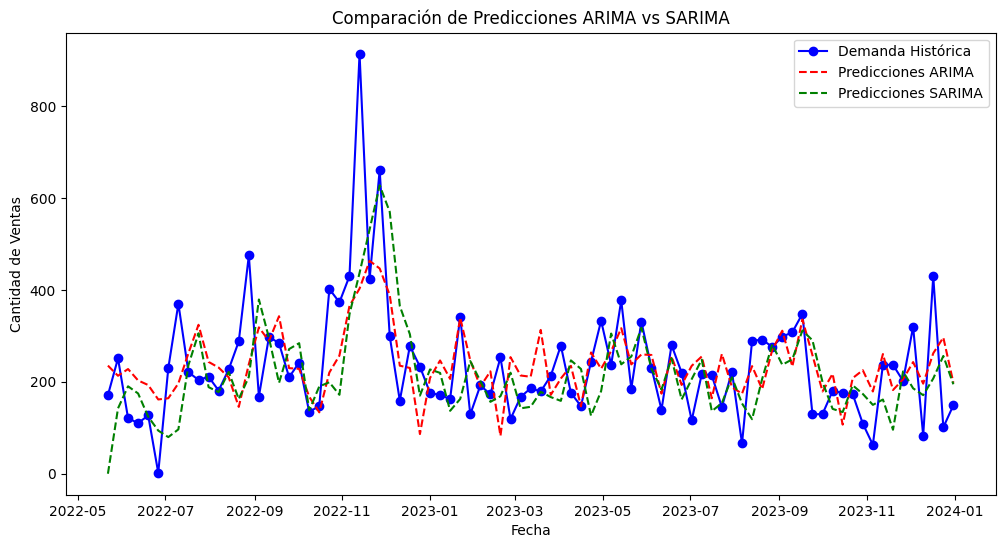

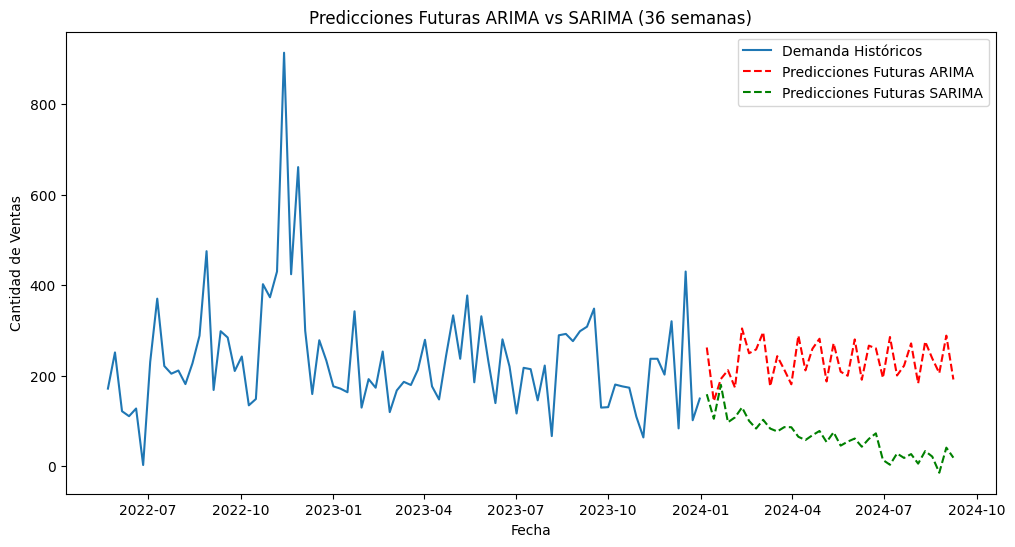

In [20]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Definir los parámetros del modelo ARIMA
model_arima2 = ARIMA(df_semanal, order=(p, d, q))
model_fit_arima2 = model_arima2.fit()

# Definir los parámetros del modelo SARIMA
model_sarima2 = SARIMAX(df_semanal, order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit_sarima2 = model_sarima2.fit()

# Realizar predicciones con ambos modelos
predictions_arima2 = model_fit_arima2.predict(start=0, end=len(df_semanal)-1, dynamic=False)
predictions_sarima2 = model_fit_sarima2.predict(start=0, end=len(df_semanal)-1, dynamic=False)

# Calcular RMSE para ambos modelos
rmse_arima2 = np.sqrt(mean_squared_error(df_semanal, predictions_arima2))
rmse_sarima2 = np.sqrt(mean_squared_error(df_semanal, predictions_sarima2))

# Mostrar los RMSE de ambos modelos
print(f'RMSE del modelo ARIMA: {rmse_arima2}')
print(f'RMSE del modelo SARIMA: {rmse_sarima2}')

# Visualizar las predicciones de ambos modelos
plt.figure(figsize=(12, 6))
plt.plot(df_semanal, label='Demanda Histórica', marker='o', linestyle='-', color='blue')
plt.plot(predictions_arima2, color='red', linestyle='--', label='Predicciones ARIMA')
plt.plot(predictions_sarima2, color='green', linestyle='--', label='Predicciones SARIMA')
plt.title('Comparación de Predicciones ARIMA vs SARIMA')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Ventas')
plt.legend()
plt.savefig('comparacion7.png')
plt.show()

# Realizar predicciones futuras para los próximos 36 semanas con ambos modelos
forecast_arima2 = model_fit_arima2.forecast(steps=36)
forecast_sarima2 = model_fit_sarima2.forecast(steps=36)

# Graficar las predicciones futuras
plt.figure(figsize=(12, 6))
plt.plot(df_semanal, label='Demanda Históricos')
plt.plot(forecast_arima2, color='red', linestyle='--', label='Predicciones Futuras ARIMA')
plt.plot(forecast_sarima2, color='green', linestyle='--', label='Predicciones Futuras SARIMA')
plt.title('Predicciones Futuras ARIMA vs SARIMA (36 semanas)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Ventas')
plt.legend()
plt.savefig('comparacion8.png')
plt.show()


In [23]:
# Paso 1: Restablecer el índice para convertirlo en una columna de fecha
df = df.reset_index()

# Paso 2: Renombrar la columna 'index' a 'Fecha' (o como prefieras llamarla)
df = df.rename(columns={'index': 'Fecha'})

# Verificar el cambio
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6295 entries, 0 to 6294
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha           6295 non-null   datetime64[ns]
 1   Num. Factura    6295 non-null   object        
 2   Comprobante     6295 non-null   object        
 3   Cliente         6295 non-null   object        
 4   Vendedor        6295 non-null   object        
 5   Referencia      6295 non-null   object        
 6   Descripción     6295 non-null   object        
 7   Costo Unitario  6295 non-null   float64       
 8   Costo Total     6295 non-null   float64       
 9   Cantidad        6295 non-null   int64         
 10  PVP             6295 non-null   float64       
 11  Subtotal        6295 non-null   float64       
 12  IVA             6295 non-null   float64       
 13  Descuento       6295 non-null   float64       
 14  Total           6295 non-null   float64       
 15  Obse

**MODELO K-MEANS PARA LA SEGMENTACIÓN DE CLIENTES** 

Total         0
Frecuencia    0
dtype: int64


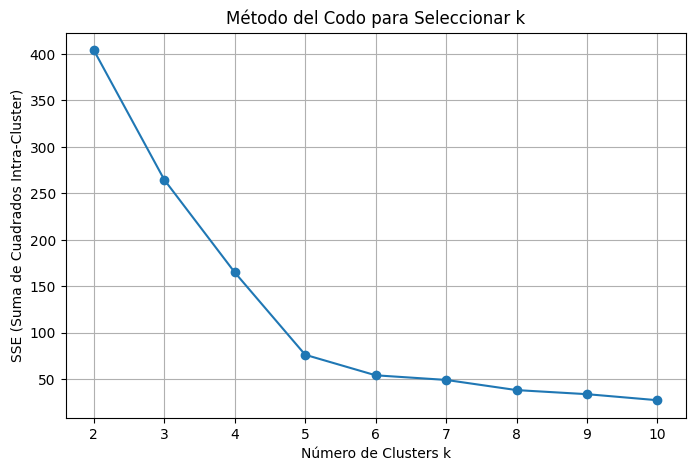

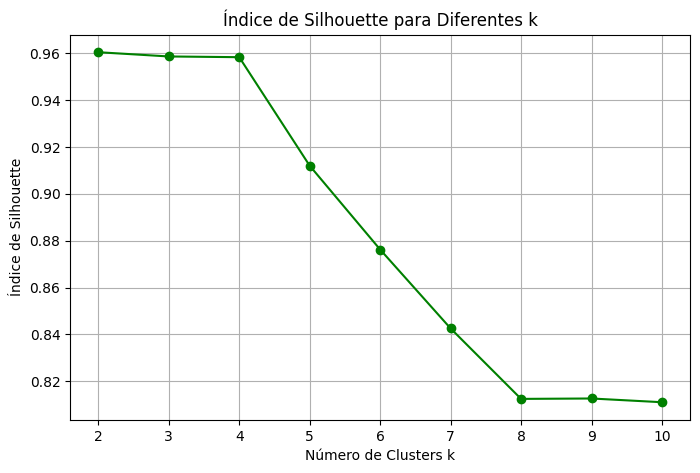

k óptimo según el índice de silhouette: 2
                     Total Ventas  Promedio Ventas  Cantidad Clientes  \
Cluster_Silhouette                                                      
0                   413633.882812       711.934394                581   
1                   410326.911801     45591.879089                  9   

                    Frecuencia Promedio  
Cluster_Silhouette                       
0                              6.342513  
1                            290.000000  


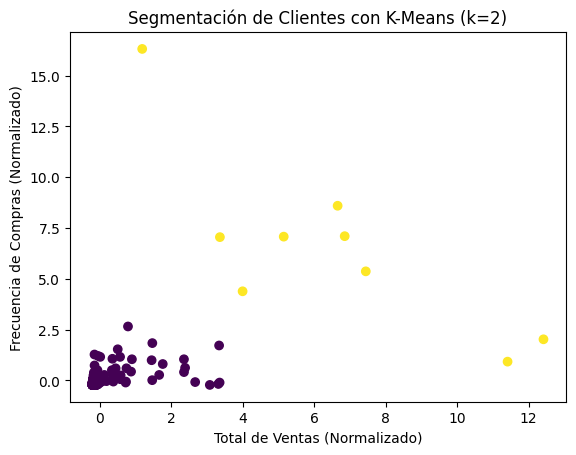

k óptimo según el método del codo: 3
               Total Ventas  Promedio Ventas  Cantidad Clientes  \
Cluster_Codo                                                      
0             413633.882812       711.934394                581   
1             400872.726071     50109.090759                  8   
2               9454.185730      9454.185730                  1   

              Frecuencia Promedio  
Cluster_Codo                       
0                        6.342513  
1                      237.750000  
2                      708.000000  


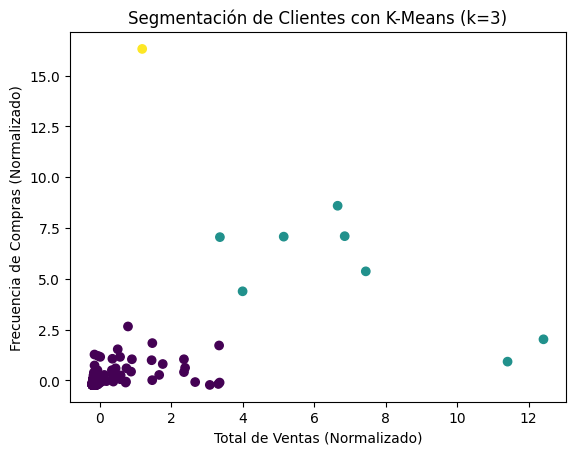

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd

# Preprocesamiento: Seleccionar las columnas relevantes para la segmentación de clientes
df_clientes = df.groupby('Cliente').agg({
'Total': 'sum', # Total de ventas por cliente
'Fecha': 'count' # Frecuencia de compras
}).rename(columns={'Fecha': 'Frecuencia'})

# Verificar si hay valores nulos en los datos
print(df_clientes.isnull().sum())
# Si hay valores nulos, eliminarlos o imputarlos
df_clientes = df_clientes.dropna()
# Preprocesamiento: Escalar los datos para K-Means
scaler = StandardScaler()
clientes_scaled = scaler.fit_transform(df_clientes)

# Listas para almacenar los valores de SSE y silhouette para diferentes k
sse = []
silhouette_scores = []
k_values = range(2, 11)  # Probar desde k=2 hasta k=10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clientes_scaled)
    sse.append(kmeans.inertia_)  # Guardar la inercia (SSE)
    
    # Calcular el índice de silhouette y guardarlo
    silhouette_avg = silhouette_score(clientes_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Gráfico del método del codo (SSE)
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.title('Método del Codo para Seleccionar k')
plt.xlabel('Número de Clusters k')
plt.ylabel('SSE (Suma de Cuadrados Intra-Cluster)')
plt.grid(True)
plt.savefig('ModeloK1.png')
plt.show()

# Gráfico del índice de silhouette
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', color='green')
plt.title('Índice de Silhouette para Diferentes k')
plt.xlabel('Número de Clusters k')
plt.ylabel('Índice de Silhouette')
plt.grid(True)
plt.savefig('ModeloK2.png')
plt.show()

# Seleccionar el k óptimo basado en el índice de silhouette más alto
k_optimo_silhouette = k_values[np.argmax(silhouette_scores)]

# Seleccionar el k óptimo basado en el método del codo (primer gran cambio en la pendiente de SSE)
dif_sse = np.diff(sse)  # Diferencias entre SSE consecutivos
k_optimo_codo = k_values[np.argmin(dif_sse) + 1]  # Elegir el punto de codo

# Aplicar KMeans con el k óptimo basado en silhouette
kmeans_silhouette = KMeans(n_clusters=k_optimo_silhouette, random_state=42)
df_clientes['Cluster_Silhouette'] = kmeans_silhouette.fit_predict(clientes_scaled)

# Agrupar por cluster para obtener el resumen de clientes con k_optimo_silhouette
resumen_silhouette = df_clientes.groupby('Cluster_Silhouette').agg({
    'Total': ['sum', 'mean'],  # Sumar las ventas totales y calcular la media
    'Frecuencia': ['count', 'mean']  # Contar clientes y calcular la frecuencia promedio
})

# Renombrar las columnas para mayor claridad
resumen_silhouette.columns = ['Total Ventas', 'Promedio Ventas', 'Cantidad Clientes', 'Frecuencia Promedio']

print(f'k óptimo según el índice de silhouette: {k_optimo_silhouette}')
print(resumen_silhouette)

# Visualización de los clusters basados en el índice de silhouette
plt.scatter(clientes_scaled[:, 0], clientes_scaled[:, 1], c=df_clientes['Cluster_Silhouette'], cmap='viridis', marker='o')
plt.title(f'Segmentación de Clientes con K-Means (k={k_optimo_silhouette})')
plt.xlabel('Total de Ventas (Normalizado)')
plt.ylabel('Frecuencia de Compras (Normalizado)')
plt.savefig('ModeloK3.png')
plt.show()

# Aplicar KMeans con el k óptimo basado en el método del codo
kmeans_codo = KMeans(n_clusters=k_optimo_codo, random_state=42)
df_clientes['Cluster_Codo'] = kmeans_codo.fit_predict(clientes_scaled)

# Agrupar por cluster para obtener el resumen de clientes con k_optimo_codo
resumen_codo = df_clientes.groupby('Cluster_Codo').agg({
    'Total': ['sum', 'mean'],  # Sumar las ventas totales y calcular la media
    'Frecuencia': ['count', 'mean']  # Contar clientes y calcular la frecuencia promedio
})

# Renombrar las columnas para mayor claridad
resumen_codo.columns = ['Total Ventas', 'Promedio Ventas', 'Cantidad Clientes', 'Frecuencia Promedio']

print(f'k óptimo según el método del codo: {k_optimo_codo}')
print(resumen_codo)

# Visualización de los clusters basados en el método del codo
plt.scatter(clientes_scaled[:, 0], clientes_scaled[:, 1], c=df_clientes['Cluster_Codo'], cmap='viridis', marker='o')
plt.title(f'Segmentación de Clientes con K-Means (k={k_optimo_codo})')
plt.xlabel('Total de Ventas (Normalizado)')
plt.ylabel('Frecuencia de Compras (Normalizado)')
plt.savefig('ModeloK4.png')
plt.show()


Modelo de Regresión Lineal

C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 29.118720283778824
R²: 0.7983388120617185
                Coeficiente
Costo Unitario     1.256749
Descuento          0.105083
Cantidad          -0.062577
Costo Total       -0.003231


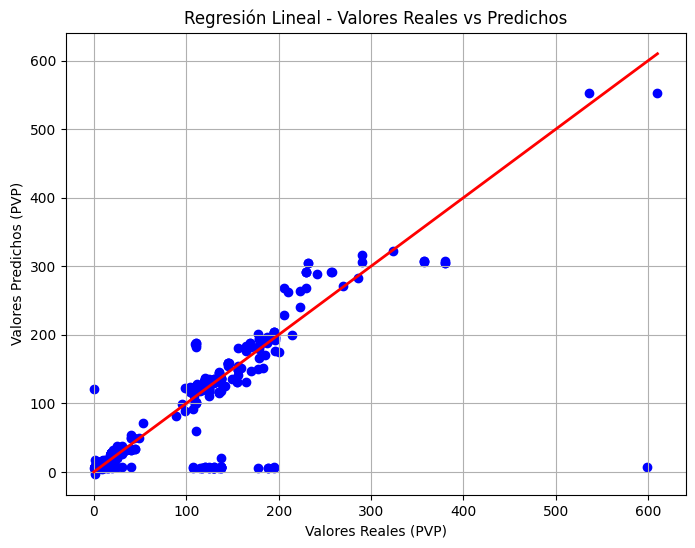

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Asegurarnos de que las columnas relevantes existen y no tienen valores nulos
df_reg = df[['PVP', 'Costo Unitario', 'Descuento', 'Cantidad', 'Costo Total']].dropna()

# Separar las variables independientes (X) y dependiente (y)
X = df_reg[['Costo Unitario', 'Descuento', 'Cantidad', 'Costo Total']]  # Variables independientes
y = df_reg['PVP']  # Variable dependiente (PVP)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')

# Mostrar los coeficientes del modelo
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
print(coef_df)

# Visualizar la relación entre los valores reales y predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Regresión Lineal - Valores Reales vs Predichos')
plt.xlabel('Valores Reales (PVP)')
plt.ylabel('Valores Predichos (PVP)')
plt.grid(True)
plt.savefig('RL1.png')
plt.show()



**APLICANDO LOGARITMOS**

C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE (Log): 0.16472923708638532
R² (Log): 0.9583768128324521
                    Coeficiente
Log_Costo_Unitario     0.585862
Log_Descuento         -0.013113
Log_Cantidad          -0.389152
Log_Costo_Total        0.196710


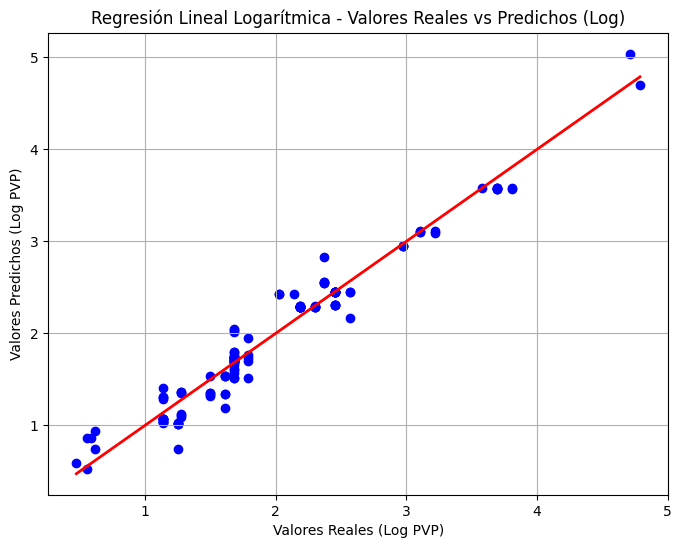

In [28]:
# Aplicar logaritmos a las variables relevantes
df_log = df[['PVP', 'Costo Unitario', 'Descuento', 'Cantidad', 'Costo Total']].copy()
df_log = df_log[df_log > 0].dropna()  # Asegurarse de que no haya valores negativos o cero

df_log['Log_PVP'] = np.log(df_log['PVP'])
df_log['Log_Costo_Unitario'] = np.log(df_log['Costo Unitario'])
df_log['Log_Descuento'] = np.log(df_log['Descuento'])
df_log['Log_Cantidad'] = np.log(df_log['Cantidad'])
df_log['Log_Costo_Total'] = np.log(df_log['Costo Total'])

# Separar las variables logarítmicas
X_log = df_log[['Log_Costo_Unitario', 'Log_Descuento', 'Log_Cantidad', 'Log_Costo_Total']]
y_log = df_log['Log_PVP']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Lineal con las variables logarítmicas
model_log = LinearRegression()
model_log.fit(X_train_log, y_train_log)

# Hacer predicciones sobre el conjunto de prueba
y_pred_log = model_log.predict(X_test_log)

# Evaluar el modelo con las variables logarítmicas
rmse_log = mean_squared_error(y_test_log, y_pred_log, squared=False)
r2_log = r2_score(y_test_log, y_pred_log)

print(f'RMSE (Log): {rmse_log}')
print(f'R² (Log): {r2_log}')

# Mostrar los coeficientes del modelo logarítmico
coef_log_df = pd.DataFrame(model_log.coef_, X_log.columns, columns=['Coeficiente'])
print(coef_log_df)

# Visualizar la relación entre los valores reales y predichos (en logaritmos)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_log, y_pred_log, color='blue')
plt.plot([y_test_log.min(), y_test_log.max()], [y_test_log.min(), y_test_log.max()], color='red', linewidth=2)
plt.title('Regresión Lineal Logarítmica - Valores Reales vs Predichos (Log)')
plt.xlabel('Valores Reales (Log PVP)')
plt.ylabel('Valores Predichos (Log PVP)')
plt.grid(True)
plt.savefig('RL2.png')
plt.show()



Intercepto (Original): 6.513222199439095
RMSE: 29.118720283778824
R²: 0.7983388120617185
                Coeficiente
Costo Unitario     1.256749
Descuento          0.105083
Cantidad          -0.062577
Costo Total       -0.003231
Intercepto (Log): 1.2089206405564543
RMSE (Log): 0.16472923708638532
R² (Log): 0.9583768128324521
                    Coeficiente
Log_Costo_Unitario     0.585862
Log_Descuento         -0.013113
Log_Cantidad          -0.389152
Log_Costo_Total        0.196710


C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


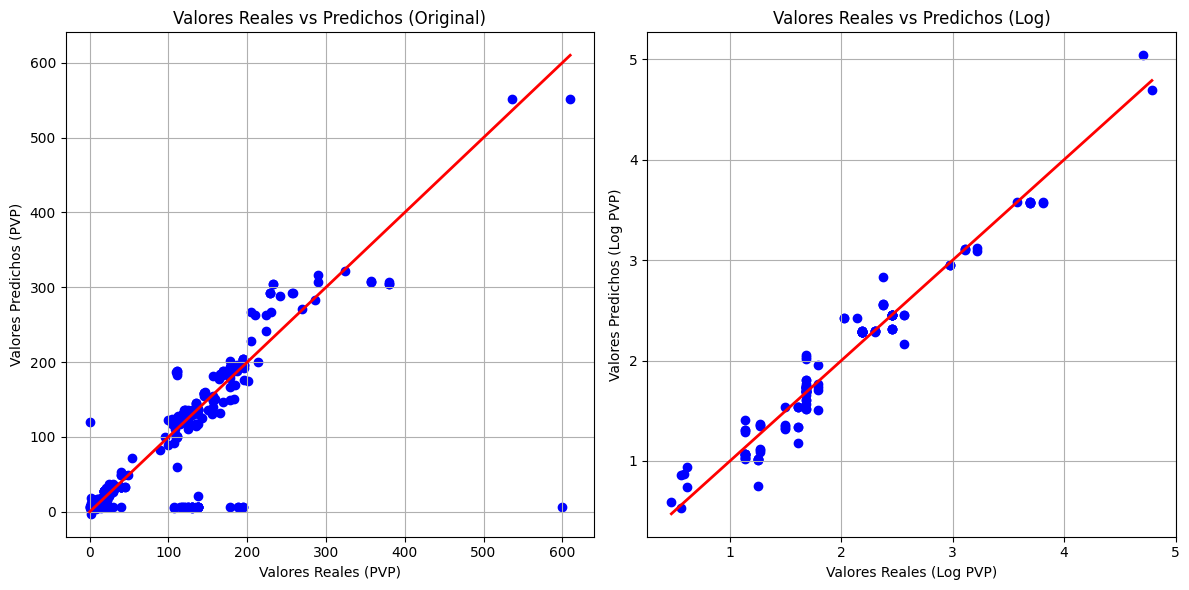

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Asegurarnos de que las columnas relevantes existen y no tienen valores nulos
df_reg = df[['PVP', 'Costo Unitario', 'Descuento', 'Cantidad', 'Costo Total']].dropna()

# Separar las variables independientes (X) y dependiente (y)
X = df_reg[['Costo Unitario', 'Descuento', 'Cantidad', 'Costo Total']]  # Variables independientes
y = df_reg['PVP']  # Variable dependiente (PVP)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Obtener el intercepto del modelo original
intercepto_original = model.intercept_
print(f'Intercepto (Original): {intercepto_original}')

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')

# Mostrar los coeficientes del modelo
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
print(coef_df)

# Aplicar logaritmos a las variables relevantes
df_log = df[['PVP', 'Costo Unitario', 'Descuento', 'Cantidad', 'Costo Total']].copy()
df_log = df_log[df_log > 0].dropna()  # Asegurarse de que no haya valores negativos o cero

df_log['Log_PVP'] = np.log(df_log['PVP'])
df_log['Log_Costo_Unitario'] = np.log(df_log['Costo Unitario'])
df_log['Log_Descuento'] = np.log(df_log['Descuento'])
df_log['Log_Cantidad'] = np.log(df_log['Cantidad'])
df_log['Log_Costo_Total'] = np.log(df_log['Costo Total'])

# Separar las variables logarítmicas
X_log = df_log[['Log_Costo_Unitario', 'Log_Descuento', 'Log_Cantidad', 'Log_Costo_Total']]
y_log = df_log['Log_PVP']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Lineal con las variables logarítmicas
model_log = LinearRegression()
model_log.fit(X_train_log, y_train_log)

# Obtener el intercepto del modelo logarítmico
intercepto_log = model_log.intercept_
print(f'Intercepto (Log): {intercepto_log}')

# Hacer predicciones sobre el conjunto de prueba
y_pred_log = model_log.predict(X_test_log)

# Evaluar el modelo con las variables logarítmicas
rmse_log = mean_squared_error(y_test_log, y_pred_log, squared=False)
r2_log = r2_score(y_test_log, y_pred_log)

print(f'RMSE (Log): {rmse_log}')
print(f'R² (Log): {r2_log}')

# Mostrar los coeficientes del modelo logarítmico
coef_log_df = pd.DataFrame(model_log.coef_, X_log.columns, columns=['Coeficiente'])
print(coef_log_df)

# Gráfico comparativo de valores reales y logarítmicos
plt.figure(figsize=(12, 6))

# Comparación de valores originales
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Valores Reales vs Predichos (Original)')
plt.xlabel('Valores Reales (PVP)')
plt.ylabel('Valores Predichos (PVP)')
plt.grid(True)

# Comparación de valores logarítmicos
plt.subplot(1, 2, 2)
plt.scatter(y_test_log, y_pred_log, color='blue')
plt.plot([y_test_log.min(), y_test_log.max()], [y_test_log.min(), y_test_log.max()], color='red', linewidth=2)
plt.title('Valores Reales vs Predichos (Log)')
plt.xlabel('Valores Reales (Log PVP)')
plt.ylabel('Valores Predichos (Log PVP)')
plt.grid(True)

plt.tight_layout()
plt.savefig('Comparacion_PVP_Log.png')
plt.show()


In [33]:
import numpy as np

# Valores base de las variables
costo_unitario = 100
descuento = 10
cantidad = 5
costo_total = 500

# Función para calcular el PVP usando el modelo logarítmico
def calcular_pvp(costo_unitario, descuento, cantidad, costo_total):
    # Calcular log(PVP) basado en los coeficientes
    log_pvp_ajustes = intercepto_log+(0.586 * np.log(costo_unitario) - 
                       0.013 * np.log(descuento) - 
                       0.389 * np.log(cantidad) + 
                       0.197 * np.log(costo_total))
    # Ajustar el PVP inicial con los efectos calculados
    pvp = np.exp(log_pvp_ajustes)
    return pvp

# Escenarios de prueba
escenarios = [
    {"costo_unitario": 110, "descuento": 10, "cantidad": 5, "costo_total": 500},  # Aumento en Costo Unitario
    {"costo_unitario": 100, "descuento": 15, "cantidad": 5, "costo_total": 500},   # Reducción en Descuento
    {"costo_unitario": 100, "descuento": 10, "cantidad": 6, "costo_total": 500},  # Aumento en Cantidad
    {"costo_unitario": 100, "descuento": 10, "cantidad": 5, "costo_total": 520},  # Aumento en Costo Total
]

# Evaluar el PVP en cada escenario
for i, escenario in enumerate(escenarios, 1):
    pvp_estimado = calcular_pvp(
        escenario["costo_unitario"],
        escenario["descuento"],
        escenario["cantidad"],
        escenario["costo_total"]
    )
    print(f"Escenario {i}: Nuevo PVP estimado = {pvp_estimado}")



Escenario 1: Nuevo PVP estimado = 92.914059651865
Escenario 2: Nuevo PVP estimado = 87.40497160389504
Escenario 3: Nuevo PVP estimado = 81.85096758557938
Escenario 4: Nuevo PVP estimado = 88.54843507421344
